In [1]:
import sys
!{sys.executable} -m pip -q install palantir fa2


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import warnings
warnings.filterwarnings("ignore")
from anndata import AnnData
import numpy as np
import pandas as pd
import scanpy as sc
import scFates as scf
import palantir
import matplotlib.pyplot as plt
sc.settings.verbosity = 3
sc.settings.logfile = sys.stdout
## fix palantir breaking down some plots
import seaborn
seaborn.reset_orig()
%matplotlib inline

sc.set_figure_params()
scf.set_figure_pubready()

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [3]:
mg = sc.read_h5ad(r"/mnt/c/Users/Emil/10X/yizhen/yizhen_microglia_only.h5ad")

In [6]:
mg.obs

orig.ident  nCount_RNA  nFeature_RNA Group  percent.mt  \
A_AAAGTGATCAGCTTCC-1            0      6420.0          2114     A    1.775701   
A_AAAGTGATCAGGAAGC-1            0      4789.0          1835     A    0.751723   
A_AACAAAGAGTAGATCA-1            0       560.0           346     A    7.857143   
A_AACCATGTCCGCACTT-1            0       668.0           345     A    2.994012   
A_AACCCAAGTGACAGGT-1            0      8356.0          2660     A    0.885591   
...                           ...         ...           ...   ...         ...   
WT_TTTCGATGTGTTACTG-1           7      1152.0           618    WT    4.253472   
WT_TTTGACTTCTTGCGCT-1           7       805.0           457    WT    4.844720   
WT_TTTGGAGTCAACTGGT-1           7       781.0           464    WT    2.048656   
WT_TTTGGAGTCGAGTACT-1           7      8089.0          2624    WT    1.532946   
WT_TTTGGTTTCCCATTTA-1           7       453.0           304    WT    1.324503   

                      keep  RNA_snn_res.2  seurat_clusters  RNA_snn_res.1  \
A_AAAGTGATCAGCTTCC-1     Y             39                6              6   
A_AAAGTGATCAGGAAGC-1     Y              7                0              0   
A_AACAAAGAGTAGATCA-1     Y              8                2              2   
A_AACCATGTCCGCACTT-1     Y              8                2              2   
A_AACCCAAGTGACAGGT-1     Y              7                0              0   
...                    ...            ...              ...            ...   
WT_TTTCGATGTGTTACTG-1    Y              6                1              1   
WT_TTTGACTTCTTGCGCT-1    Y              6                1              1   
WT_TTTGGAGTCAACTGGT-1    Y             33                5              5   
WT_TTTGGAGTCGAGTACT-1    Y              7                0              0   
WT_TTTGGTTTCCCATTTA-1    Y             33                5              5   

                                         ident_v1   ident_L1 ident_v2  
A_AAAGTGATCAGCTTCC-1         Microglia_Inflamm_C1  Microglia        6  
A_AAAGTGATCAGGAAGC-1        Microglia_IFN-Resp_C2  Microglia        0  
A_AACAAAGAGTAGATCA-1        Microglia_IFN-Resp_C2  Microglia        2  
A_AACCATGTCCGCACTT-1        Microglia_IFN-Resp_C2  Microglia        2  
A_AACCCAAGTGACAGGT-1        Microglia_IFN-Resp_C2  Microglia        0  
...                                           ...        ...      ...  
WT_TTTCGATGTGTTACTG-1        Microglia_resting_C0  Microglia        1  
WT_TTTGACTTCTTGCGCT-1        Microglia_resting_C0  Microglia        1  
WT_TTTGGAGTCAACTGGT-1  Microglia_Proliferating_C3  Microglia        5  
WT_TTTGGAGTCGAGTACT-1       Microglia_IFN-Resp_C2  Microglia        0  
WT_TTTGGTTTCCCATTTA-1        Microglia_resting_C0  Microglia        5  

[5960 rows x 12 columns]

In [9]:
sc.pp.pca(mg)
pca_projections = pd.DataFrame(mg.obsm["X_pca"],index=mg.obs_names)

computing PCA
    with n_comps=50
    finished (0:00:53)


In [10]:
dm_res = palantir.utils.run_diffusion_maps(pca_projections)
ms_data = palantir.utils.determine_multiscale_space(dm_res,n_eigs=4)

Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)


In [11]:
# generate neighbor draph in multiscale diffusion space
mg.obsm["X_palantir"]=ms_data.values
sc.pp.neighbors(mg,n_neighbors=30,use_rep="X_palantir")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [12]:
# draw ForceAtlas2 embedding using 3 first PCs as initial positions
mg.obsm["X_pca2d"]=mg.obsm["X_pca"][:,:3]
sc.tl.draw_graph(mg, layout = 'fa',init_pos='X_pca2d')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:42)


In [ ]:
sc.pp.pca(mg)
pca_projections = pd.DataFrame(mg.obsm["X_pca"],index=mg.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections)
ms_data = palantir.utils.determine_multiscale_space(dm_res,n_eigs=4)
mg.obsm["X_palantir"]=ms_data.values
sc.pp.neighbors(mg,n_neighbors=30,use_rep="X_palantir")
mg.obsm["X_pca2d"]=mg.obsm["X_pca"][:,:3]
sc.tl.draw_graph(mg, layout = 'fa',init_pos='X_pca2d')
sc.pl.draw_graph(mg,color=['Cx3cr1', 'ident_v1'], layout = 'fa')

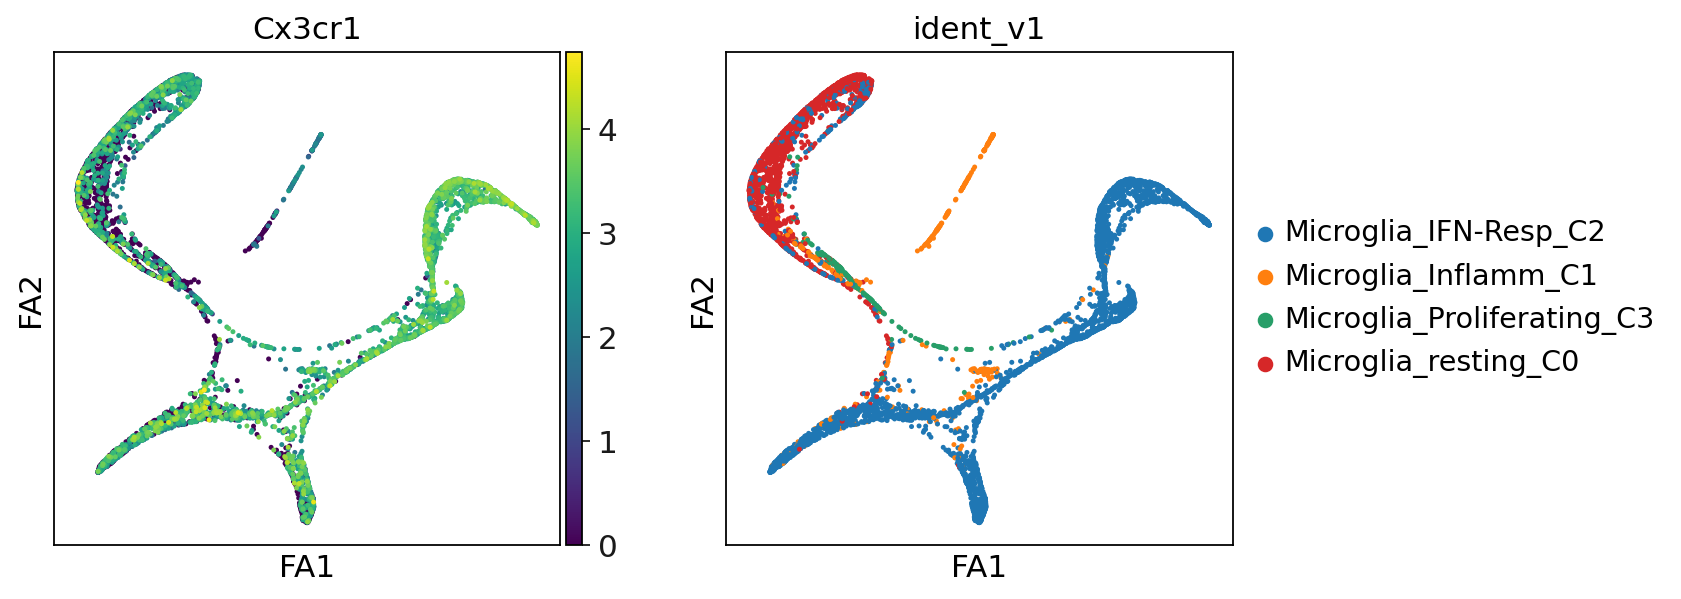

In [14]:
sc.set_figure_params()
sc.pl.draw_graph(mg,color=['Cx3cr1', 'ident_v1'], layout = 'fa')

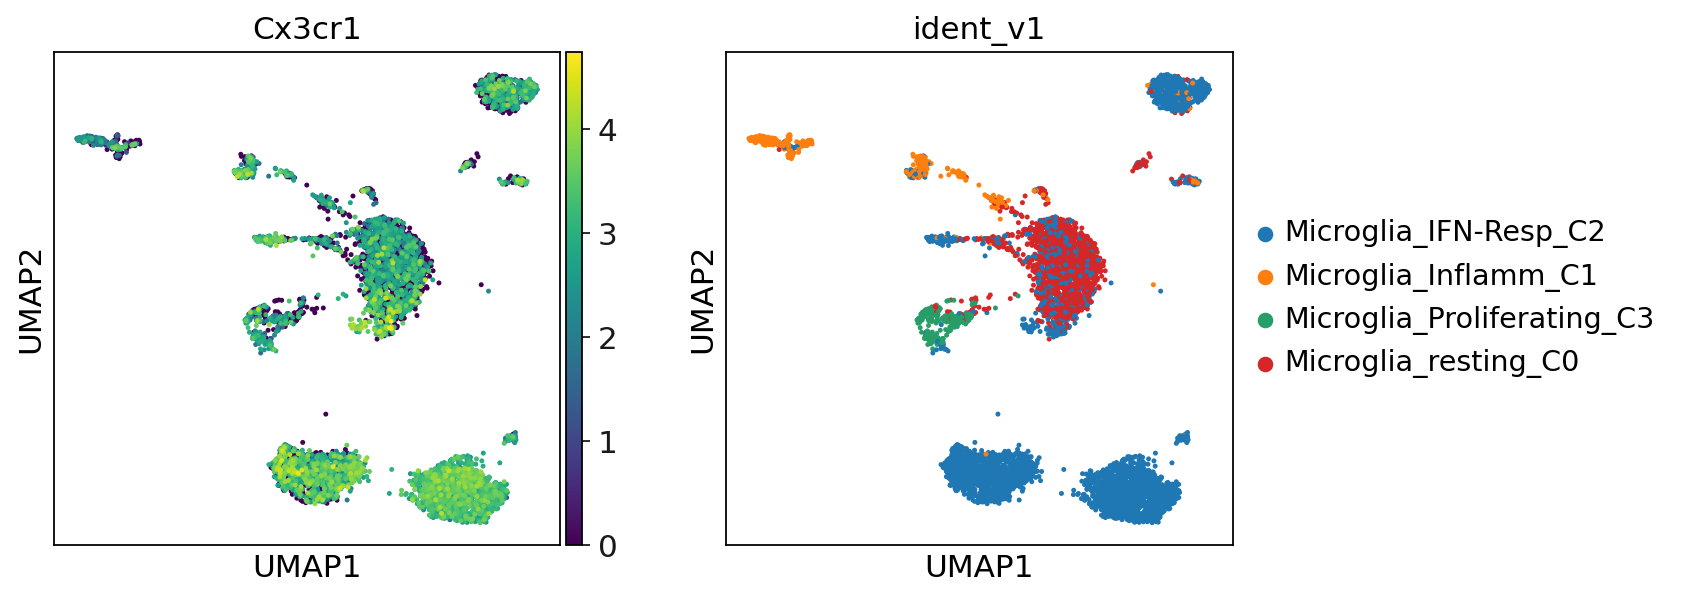

In [16]:
sc.set_figure_params()
sc.pl.umap(mg,color=['Cx3cr1', 'ident_v1'])

In [17]:
mg.obs

orig.ident  nCount_RNA  nFeature_RNA Group  percent.mt  \
A_AAAGTGATCAGCTTCC-1            0      6420.0          2114     A    1.775701   
A_AAAGTGATCAGGAAGC-1            0      4789.0          1835     A    0.751723   
A_AACAAAGAGTAGATCA-1            0       560.0           346     A    7.857143   
A_AACCATGTCCGCACTT-1            0       668.0           345     A    2.994012   
A_AACCCAAGTGACAGGT-1            0      8356.0          2660     A    0.885591   
...                           ...         ...           ...   ...         ...   
WT_TTTCGATGTGTTACTG-1           7      1152.0           618    WT    4.253472   
WT_TTTGACTTCTTGCGCT-1           7       805.0           457    WT    4.844720   
WT_TTTGGAGTCAACTGGT-1           7       781.0           464    WT    2.048656   
WT_TTTGGAGTCGAGTACT-1           7      8089.0          2624    WT    1.532946   
WT_TTTGGTTTCCCATTTA-1           7       453.0           304    WT    1.324503   

                      keep  RNA_snn_res.2  seurat_clusters  RNA_snn_res.1  \
A_AAAGTGATCAGCTTCC-1     Y             39                6              6   
A_AAAGTGATCAGGAAGC-1     Y              7                0              0   
A_AACAAAGAGTAGATCA-1     Y              8                2              2   
A_AACCATGTCCGCACTT-1     Y              8                2              2   
A_AACCCAAGTGACAGGT-1     Y              7                0              0   
...                    ...            ...              ...            ...   
WT_TTTCGATGTGTTACTG-1    Y              6                1              1   
WT_TTTGACTTCTTGCGCT-1    Y              6                1              1   
WT_TTTGGAGTCAACTGGT-1    Y             33                5              5   
WT_TTTGGAGTCGAGTACT-1    Y              7                0              0   
WT_TTTGGTTTCCCATTTA-1    Y             33                5              5   

                                         ident_v1   ident_L1 ident_v2  
A_AAAGTGATCAGCTTCC-1         Microglia_Inflamm_C1  Microglia        6  
A_AAAGTGATCAGGAAGC-1        Microglia_IFN-Resp_C2  Microglia        0  
A_AACAAAGAGTAGATCA-1        Microglia_IFN-Resp_C2  Microglia        2  
A_AACCATGTCCGCACTT-1        Microglia_IFN-Resp_C2  Microglia        2  
A_AACCCAAGTGACAGGT-1        Microglia_IFN-Resp_C2  Microglia        0  
...                                           ...        ...      ...  
WT_TTTCGATGTGTTACTG-1        Microglia_resting_C0  Microglia        1  
WT_TTTGACTTCTTGCGCT-1        Microglia_resting_C0  Microglia        1  
WT_TTTGGAGTCAACTGGT-1  Microglia_Proliferating_C3  Microglia        5  
WT_TTTGGAGTCGAGTACT-1       Microglia_IFN-Resp_C2  Microglia        0  
WT_TTTGGTTTCCCATTTA-1        Microglia_resting_C0  Microglia        5  

[5960 rows x 12 columns]

In [18]:
import scvelo as scv

In [23]:
mg_A = mg[mg.obs['Group'].isin(['A'])]
mg_WTB = mg[mg.obs['Group'].isin(['WT','B'])]
mg_GF = mg[mg.obs['Group'].isin(['GF'])]
mg_KO = mg[mg.obs['Group'].isin(['KO'])]
mg_SPF = mg[mg.obs['Group'].isin(['SPF'])]
mg_MBA = mg[mg.obs['Group'].isin(['MB-A'])]
mg_MBNA = mg[mg.obs['Group'].isin(['MB-NA'])]

In [22]:
mg.obs.Group.value_counts()

KO       2827
WT        956
GF        782
SPF       446
A         347
MB-A      238
B         184
MB-NA     180
Name: Group, dtype: int64

In [24]:
A = scv.read("/mnt/c/Users/Emil/10X/yizhen/A.loom", cache = True)
B = scv.read("/mnt/c/Users/Emil/10X/yizhen/B.loom", cache = True)
GF = scv.read("/mnt/c/Users/Emil/10X/yizhen/GF.loom", cache = True)
WT = scv.read("/mnt/c/Users/Emil/10X/yizhen/WT.loom", cache = True)
KO = scv.read("/mnt/c/Users/Emil/10X/yizhen/KO.loom", cache = True)
SPF = scv.read("/mnt/c/Users/Emil/10X/yizhen/SPF.loom", cache = True)
MBA = scv.read("/mnt/c/Users/Emil/10X/yizhen/MB-A.loom", cache = True)
MBNA = scv.read("/mnt/c/Users/Emil/10X/yizhen/MB-NA.loom", cache = True)

... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time


In [25]:
mg_A = scv.utils.merge(mg_A, A)
mg_WTB = scv.utils.merge(mg_WTB, WT,B)
mg_GF = scv.utils.merge(mg_GF, GF)
mg_KO = scv.utils.merge(mg_KO, KO)
mg_SPF = scv.utils.merge(mg_SPF, SPF)
mg_MBA = scv.utils.merge(mg_MBA, MBA)
mg_MBNA = scv.utils.merge(mg_MBNA, MBNA)

In [26]:
sc.tl.score_genes(mg, gene_list = ['Cxcl10','Stat1','Ifit1'], score_name = 'IFN-response')

computing score 'IFN-response'
    finished: added
    'IFN-response', score of gene set (adata.obs).
    150 total control genes are used. (0:00:00)


In [27]:
sc.tl.score_genes(mg, gene_list = ['Apoe','Igf1','H2-Aa','Cd74'], score_name = 'Inflammatory')

computing score 'Inflammatory'
    finished: added
    'Inflammatory', score of gene set (adata.obs).
    149 total control genes are used. (0:00:00)


In [28]:
sc.tl.score_genes(mg, gene_list = ['P2ry12', 'Ccr5', 'Cd33', 'Csf1r', 'Cx3cr1', 'Glul', 'Gpr34', 'Adgrg1', 'Tgfb1', 'Tgfbr1', 'Serinc3', 'Siglech', 'Mertk', 'Bin1', 'Tmem119', 'Spi1', 'Sall1', 'Mafb', 'Smad3', 'Mef2a', 'Egr1', 'Jun'], score_name = 'Homeostatic')

computing score 'Homeostatic'
    finished: added
    'Homeostatic', score of gene set (adata.obs).
    148 total control genes are used. (0:00:00)


In [29]:
sc.tl.score_genes(mg, gene_list = ['Apoe', 'Axl', 'Clec7a', 'Csf1', 'Cst7', 'Ctsb', 'Ctsd', 'Cybb', 'Fabp5', 'Fth1', 'Gnas', 'Gpnmb', 'Grn', 'Il1b', 'Lgals3', 'Lilrb4a', 'Lpl', 'Lyz2', 'Msr1', 'Spp1', 'Trem2', 'Tyrobp', 'Vegfa', 'H2-Ab1'], score_name = 'Proinflammatory')

computing score 'Proinflammatory'
    finished: added
    'Proinflammatory', score of gene set (adata.obs).
    457 total control genes are used. (0:00:00)


In [30]:
sc.tl.score_genes(mg, gene_list = ['Mki67','Cdc20'], score_name = 'Proliferating')

computing score 'Proliferating'
    finished: added
    'Proliferating', score of gene set (adata.obs).
    100 total control genes are used. (0:00:00)


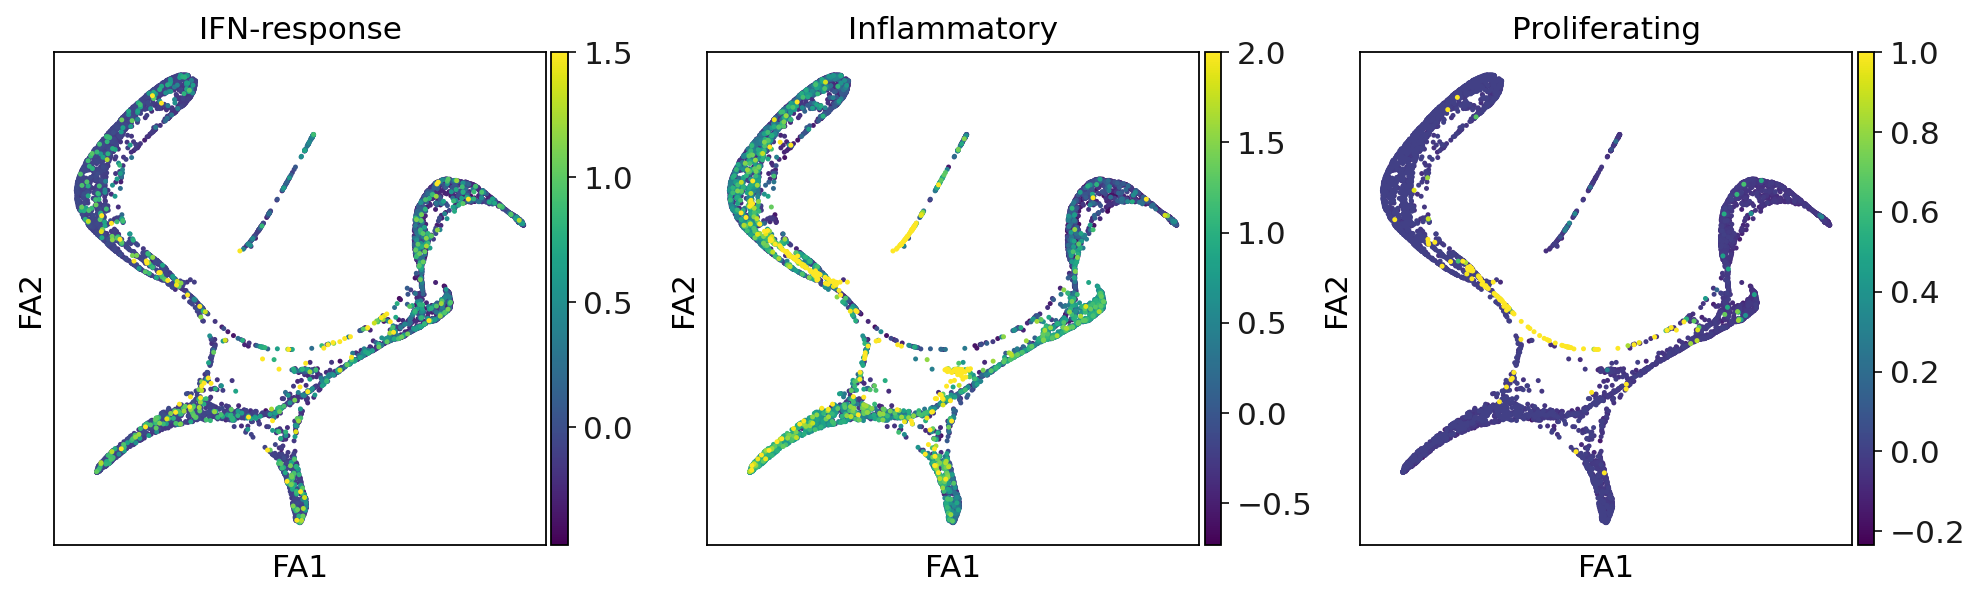

In [36]:
sc.pl.draw_graph(mg,color=['IFN-response','Inflammatory','Proliferating'], vmax = [1.5,2,1])

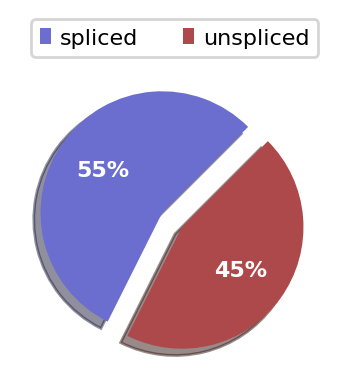

In [37]:
scv.pl.proportions(mg_A)

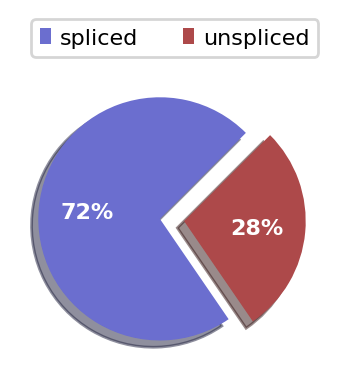

In [38]:
scv.pl.proportions(mg_WTB)

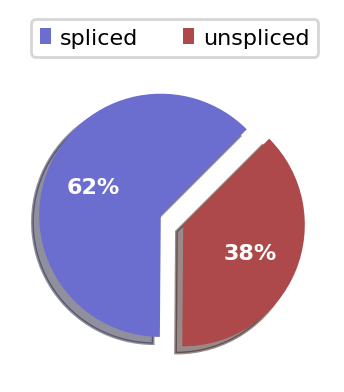

In [39]:
scv.pl.proportions(mg_GF)


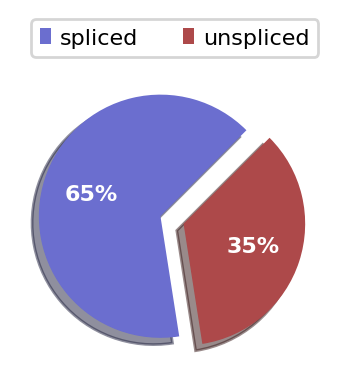

In [40]:
scv.pl.proportions(mg_KO)


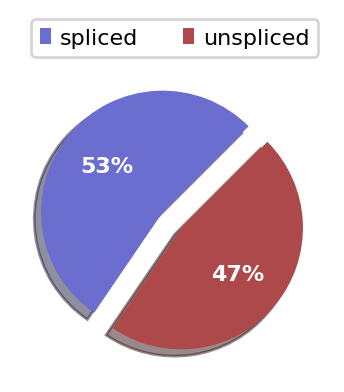

In [41]:
scv.pl.proportions(mg_SPF)


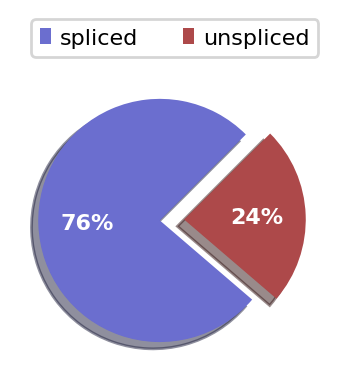

In [42]:
scv.pl.proportions(mg_MBA)


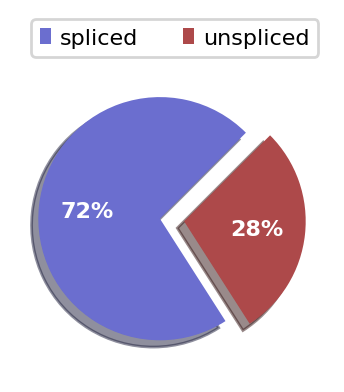

In [43]:
scv.pl.proportions(mg_MBNA)

In [46]:
def cluster_small_multiples(
    adata, clust_key, size=60, frameon=False, legend_loc=None, **kwargs
):
    tmp = adata.copy()

    for i, clust in enumerate(adata.obs[clust_key].cat.categories):
        tmp.obs[clust] = adata.obs[clust_key].isin([clust]).astype("category")
        tmp.uns[clust + "_colors"] = ["#d3d3d3", adata.uns[clust_key + "_colors"][i]]

    sc.pl.draw_graph(
        tmp,
        groups=tmp.obs[clust].cat.categories[1:].values,
        color=adata.obs[clust_key].cat.categories.tolist(),
        size=size,
        frameon=frameon,
        legend_loc=legend_loc,
        **kwargs,
    )

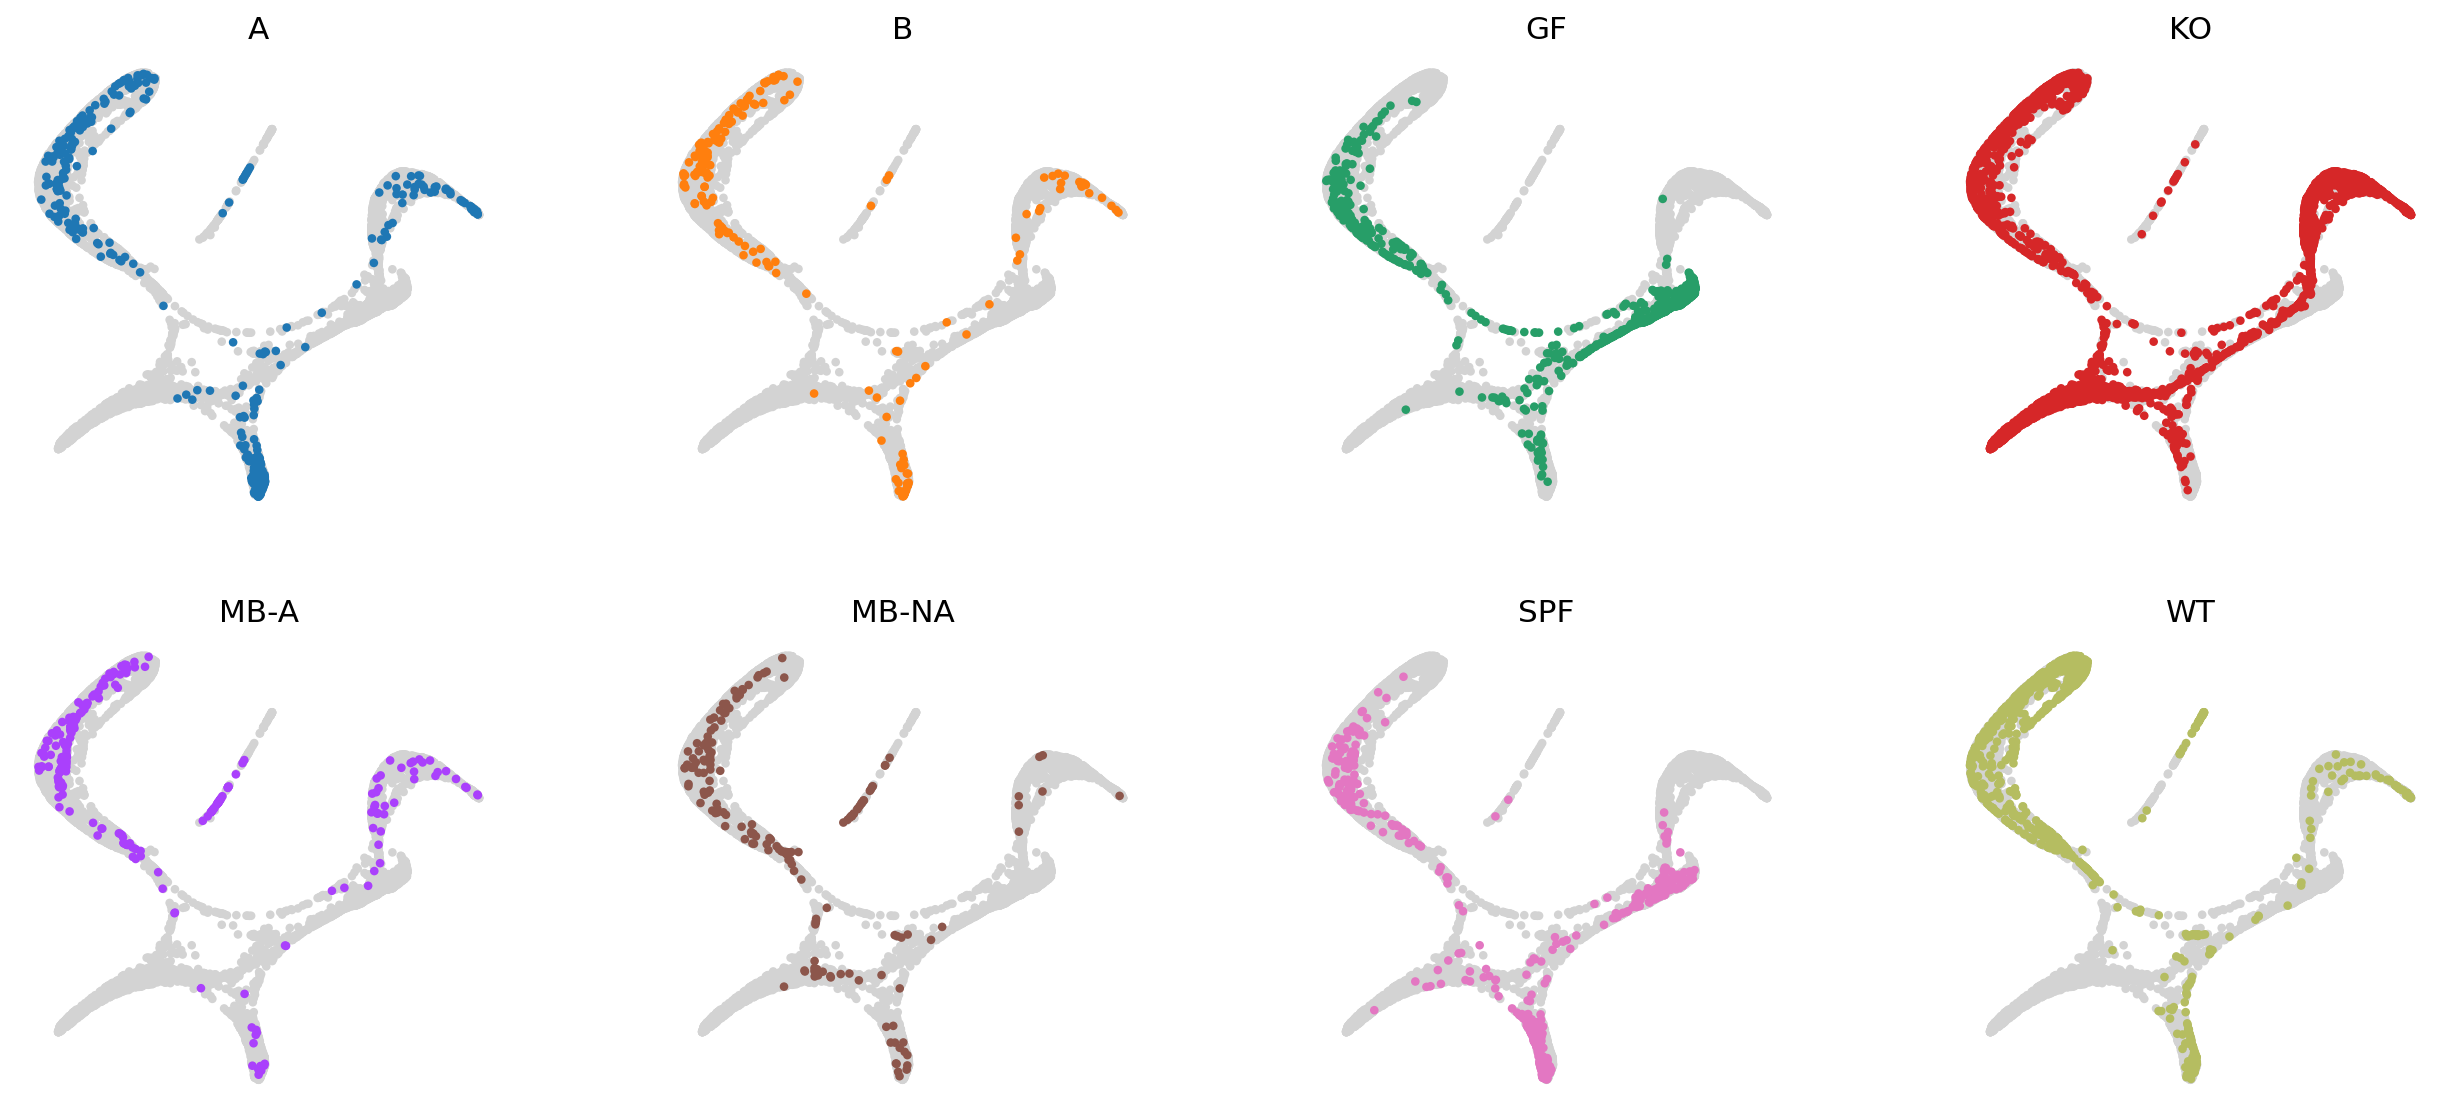

In [49]:
cluster_small_multiples(mg, clust_key = 'Group')

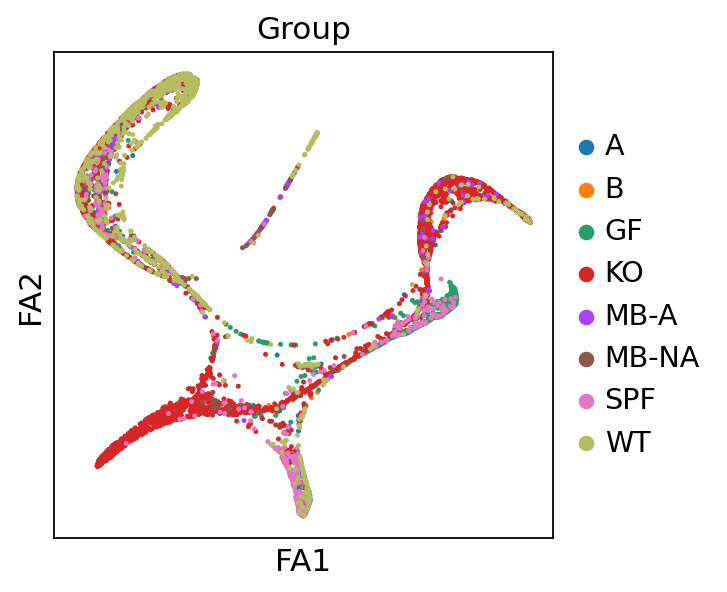

In [48]:
sc.pl.draw_graph(mg,color=['Group'])

In [50]:
scv.pp.filter_and_normalize(mg_A, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(mg_A, n_pcs=30, n_neighbors=30)
scv.pp.filter_and_normalize(mg_WTB, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(mg_WTB, n_pcs=30, n_neighbors=30)
scv.pp.filter_and_normalize(mg_GF, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(mg_GF, n_pcs=30, n_neighbors=30)
scv.pp.filter_and_normalize(mg_KO, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(mg_KO, n_pcs=30, n_neighbors=30)
scv.pp.filter_and_normalize(mg_MBNA, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(mg_MBNA, n_pcs=30, n_neighbors=30)
scv.pp.filter_and_normalize(mg_SPF, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(mg_SPF, n_pcs=30, n_neighbors=30)

Filtered out 19599 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Filtered out 17771 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2092 highly variable genes.
or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Filtered out 18485 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
or is corrupted (e.g. due to subsetting). Consider recomputing with 

In [52]:
scv.tl.velocity(mg_A)
scv.tl.velocity(mg_WTB)
scv.tl.velocity(mg_KO)
scv.tl.velocity(mg_GF)
scv.tl.velocity(mg_SPF)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [54]:

scv.tl.velocity(mg_MBNA)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [58]:
mg_MBA.obs

orig.ident  nCount_RNA  nFeature_RNA Group  percent.mt keep  \
AAACGAACATCCCGTT           4       949.0           485  MB-A    2.423604    Y   
AAACGCTTCGACTCCT           4      4373.0          1642  MB-A    4.139035    Y   
AAGAACATCTATGTGG           4      2414.0          1081  MB-A    0.248550    Y   
AAGCATCTCAAGTTGC           4      1296.0           663  MB-A    0.000000    Y   
AAGTACCGTGTATCCA           4      4435.0          1827  MB-A    2.976325    Y   
...                      ...         ...           ...   ...         ...  ...   
TTCGCTGCAGGCGTTC           4      1845.0           699  MB-A    1.680217    Y   
TTCTAACTCCTTCGAC           4       951.0           520  MB-A    0.000000    Y   
TTGCATTTCGGTTAGT           4      8895.0          2682  MB-A    2.956717    Y   
TTGCGTCAGAGTGGCT           4      3976.0          1533  MB-A    1.332998    Y   
TTTGACTGTTAACAGA           4      2050.0           750  MB-A    0.097561    Y   

                 RNA_snn_res.2 seurat_clusters RNA_snn_res.1  \
AAACGAACATCCCGTT             6              10            10   
AAACGCTTCGACTCCT            30               6             6   
AAGAACATCTATGTGG            30              12            12   
AAGCATCTCAAGTTGC            33               5             5   
AAGTACCGTGTATCCA             7               0             0   
...                        ...             ...           ...   
TTCGCTGCAGGCGTTC             6               7             7   
TTCTAACTCCTTCGAC             6               1             1   
TTGCATTTCGGTTAGT            39               6             6   
TTGCGTCAGAGTGGCT             7               0             0   
TTTGACTGTTAACAGA             6               1             1   

                                    ident_v1   ident_L1 ident_v2 Clusters  \
AAACGAACATCCCGTT        Microglia_resting_C0  Microglia       10        5   
AAACGCTTCGACTCCT        Microglia_Inflamm_C1  Microglia        6        3   
AAGAACATCTATGTGG        Microglia_Inflamm_C1  Microglia       12        4   
AAGCATCTCAAGTTGC  Microglia_Proliferating_C3  Microglia        5        2   
AAGTACCGTGTATCCA       Microglia_IFN-Resp_C2  Microglia        0        0   
...                                      ...        ...      ...      ...   
TTCGCTGCAGGCGTTC        Microglia_resting_C0  Microglia        7        2   
TTCTAACTCCTTCGAC        Microglia_resting_C0  Microglia        1        7   
TTGCATTTCGGTTAGT        Microglia_Inflamm_C1  Microglia        6        0   
TTGCGTCAGAGTGGCT       Microglia_IFN-Resp_C2  Microglia        0        2   
TTTGACTGTTAACAGA        Microglia_resting_C0  Microglia        1        6   

                         _X         _Y  initial_size_spliced  \
AAACGAACATCCCGTT -32.926945  -3.418268                   713   
AAACGCTTCGACTCCT  10.051561  36.660179                  3120   
AAGAACATCTATGTGG  -0.032628 -23.696198                  1929   
AAGCATCTCAAGTTGC  -2.508087  24.011988                  1033   
AAGTACCGTGTATCCA  12.223836   6.759122                  3341   
...                     ...        ...                   ...   
TTCGCTGCAGGCGTTC -10.541703  22.416237                  1461   
TTCTAACTCCTTCGAC -28.271715 -17.401060                   787   
TTGCATTTCGGTTAGT   2.705930   0.452610                  6536   
TTGCGTCAGAGTGGCT -10.220927  33.495388                  3207   
TTTGACTGTTAACAGA  39.917820  -3.083268                  1579   

                  initial_size_unspliced  initial_size    n_counts  
AAACGAACATCCCGTT                      50         713.0 -287.924072  
AAACGCTTCGACTCCT                    3799        3120.0  935.078247  
AAGAACATCTATGTGG                     173        1929.0   31.710213  
AAGCATCTCAAGTTGC                      32        1033.0 -270.432251  
AAGTACCGTGTATCCA                    3811        3341.0  497.823669  
...                                  ...           ...         ...  
TTCGCTGCAGGCGTTC                      22        1461.0 -184.990601  
TTCTAACTCCTTCGAC              

In [60]:
scv.pp.filter_and_normalize(mg_MBA, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(mg_MBA, n_pcs=30, n_neighbors=30)

Filtered out 944 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [61]:
scv.tl.velocity(mg_MBA)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [63]:
sc.pp.neighbors(mg_A)
sc.pp.neighbors(mg_KO)
sc.pp.neighbors(mg_WTB)
sc.pp.neighbors(mg_GF)
sc.pp.neighbors(mg_SPF)
sc.pp.neighbors(mg_MBA)
sc.pp.neighbors(mg_MBNA)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbor

In [65]:
scv.tl.velocity_graph(mg_A)
scv.tl.velocity_graph(mg_WTB)
scv.tl.velocity_graph(mg_KO)


computing velocity graph (using 1/12 cores)


  0%|          | 0/225 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 1/12 cores)


  0%|          | 0/490 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 1/12 cores)


  0%|          | 0/1694 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [66]:
scv.tl.velocity_graph(mg_GF)
scv.tl.velocity_graph(mg_SPF)


computing velocity graph (using 1/12 cores)


  0%|          | 0/743 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 1/12 cores)


  0%|          | 0/341 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [67]:
scv.tl.velocity_graph(mg_MBA)
scv.tl.velocity_graph(mg_MBNA)

computing velocity graph (using 1/12 cores)


  0%|          | 0/175 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 1/12 cores)


  0%|          | 0/155 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_draw_graph_fa', embedded velocity vectors (adata.obsm)


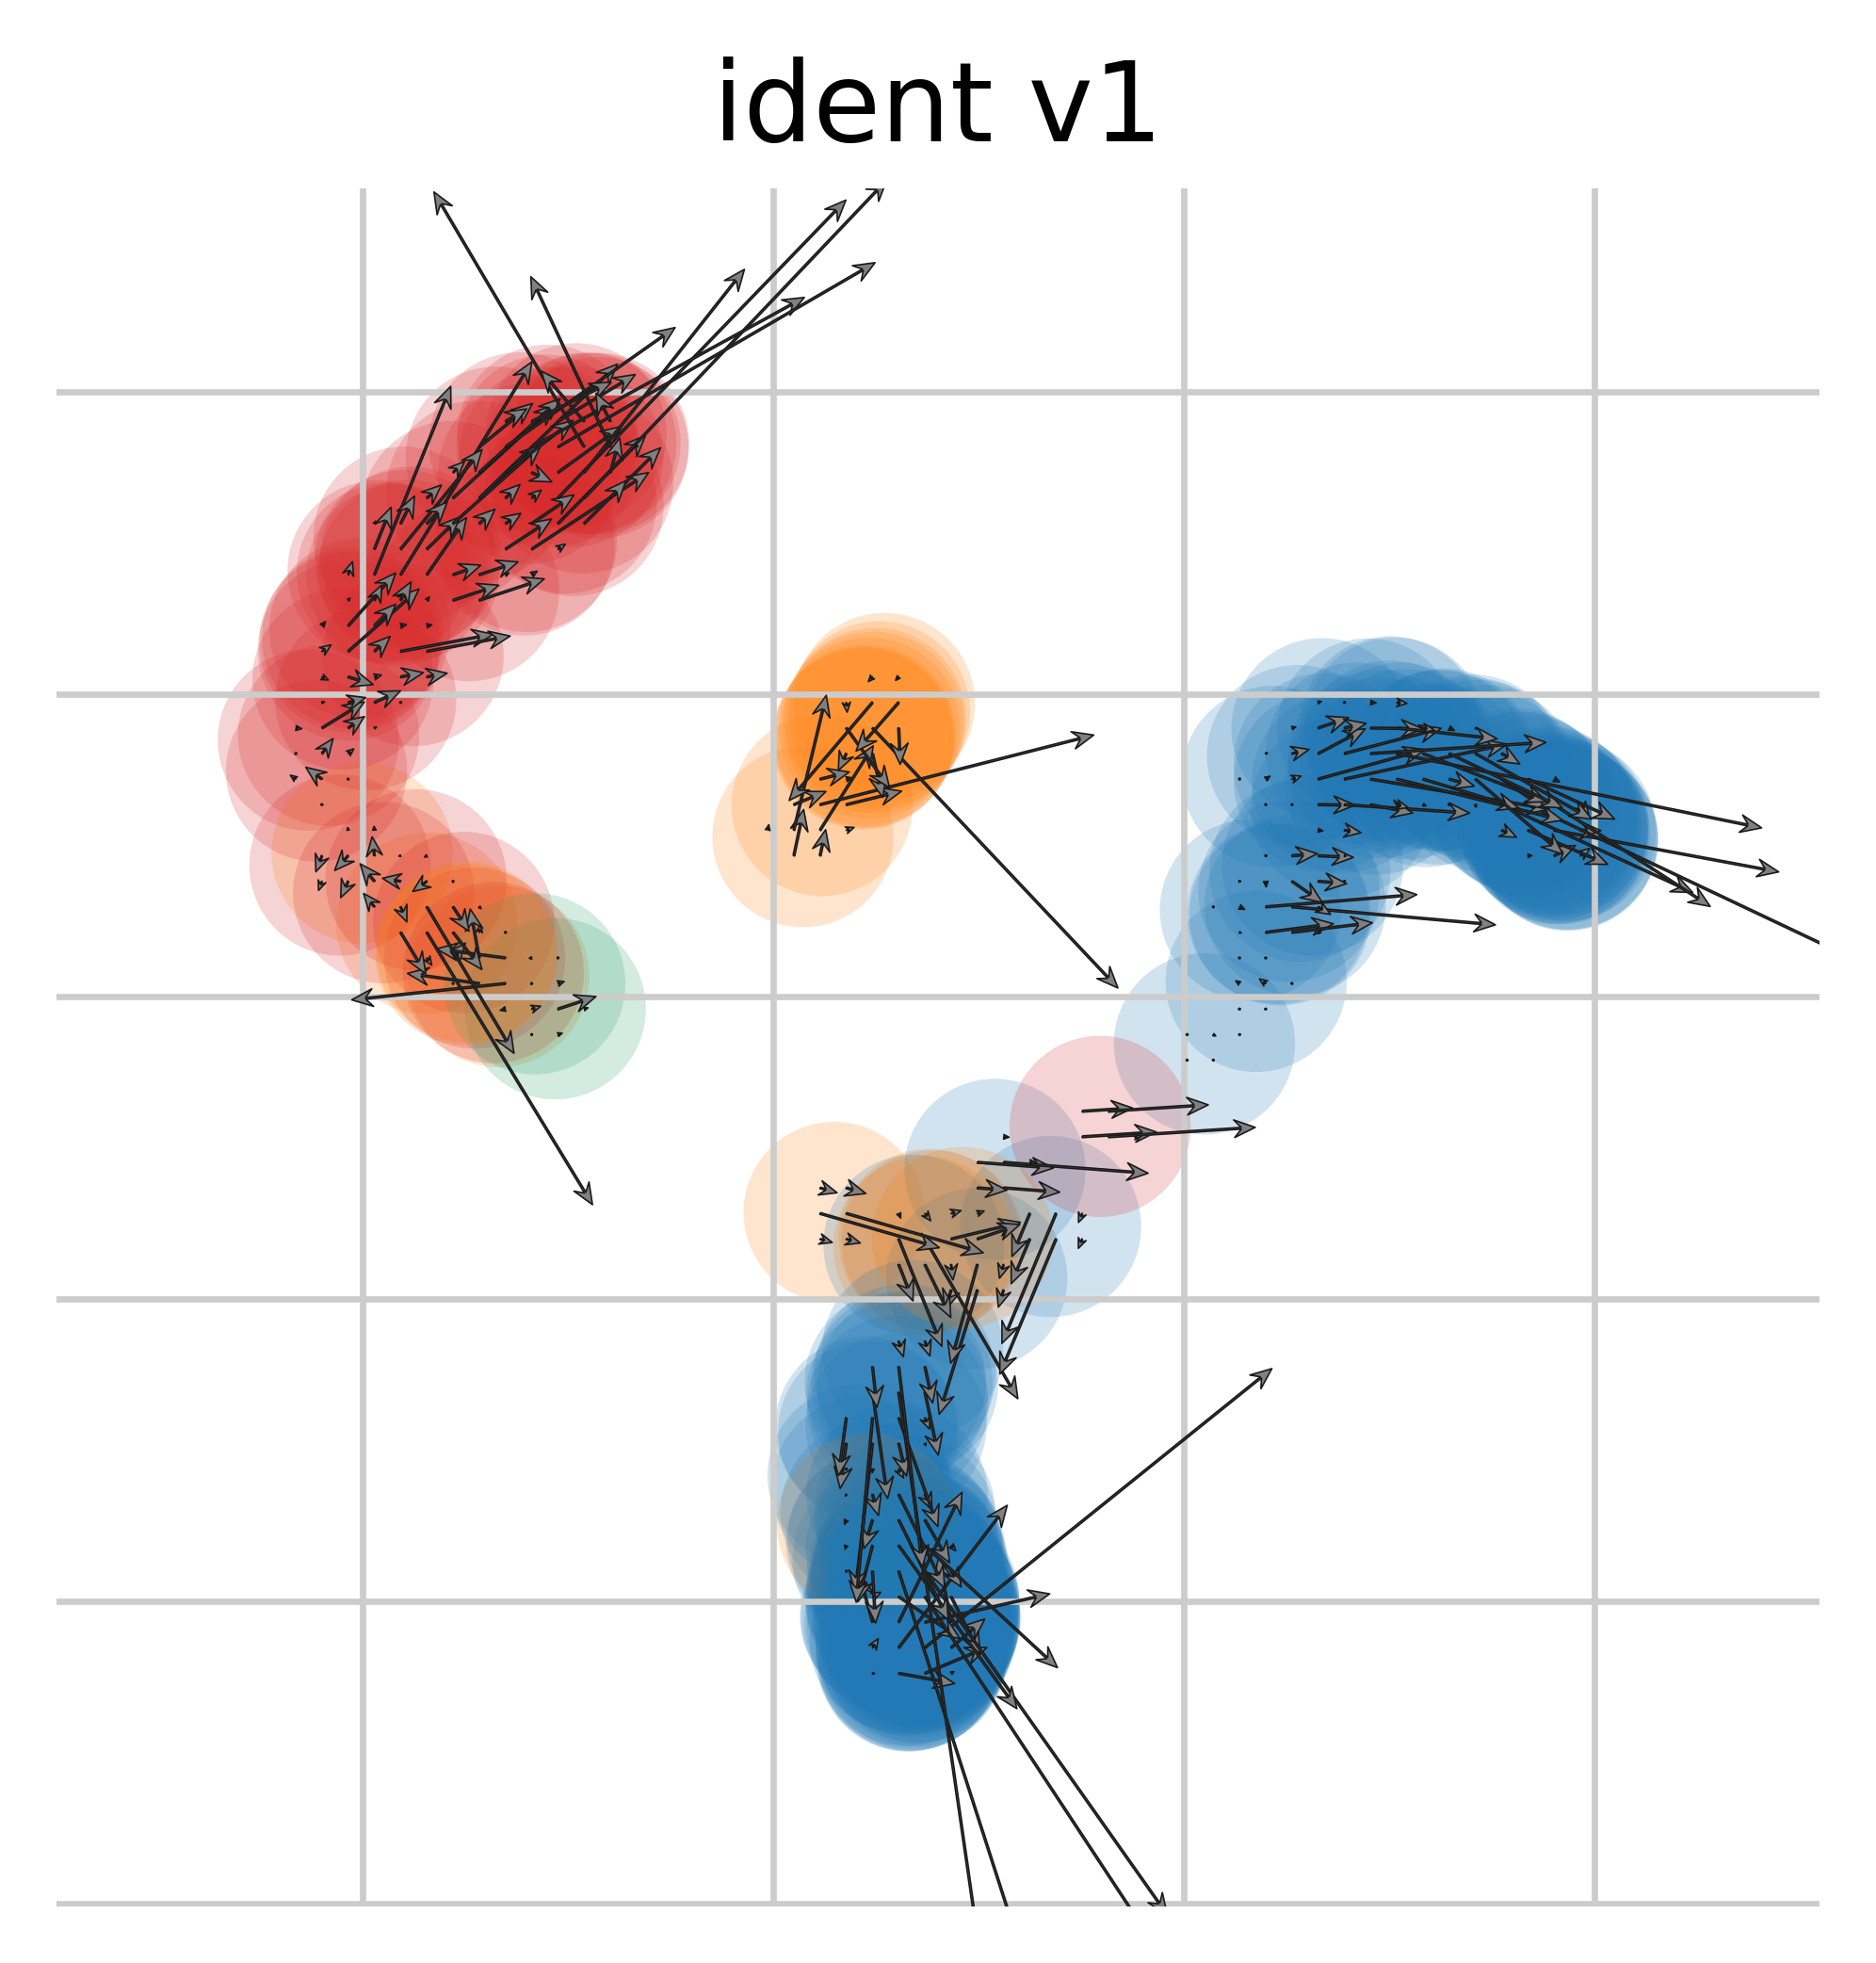

In [116]:
scv.pl.velocity_embedding_grid(mg_A, basis='draw_graph_fa', color = 'ident_v1', dpi = 300, add_margin = 0.2, figsize = (4,4), arrow_length = 8, arrow_size = 2, density = 1)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_draw_graph_fa', embedded velocity vectors (adata.obsm)


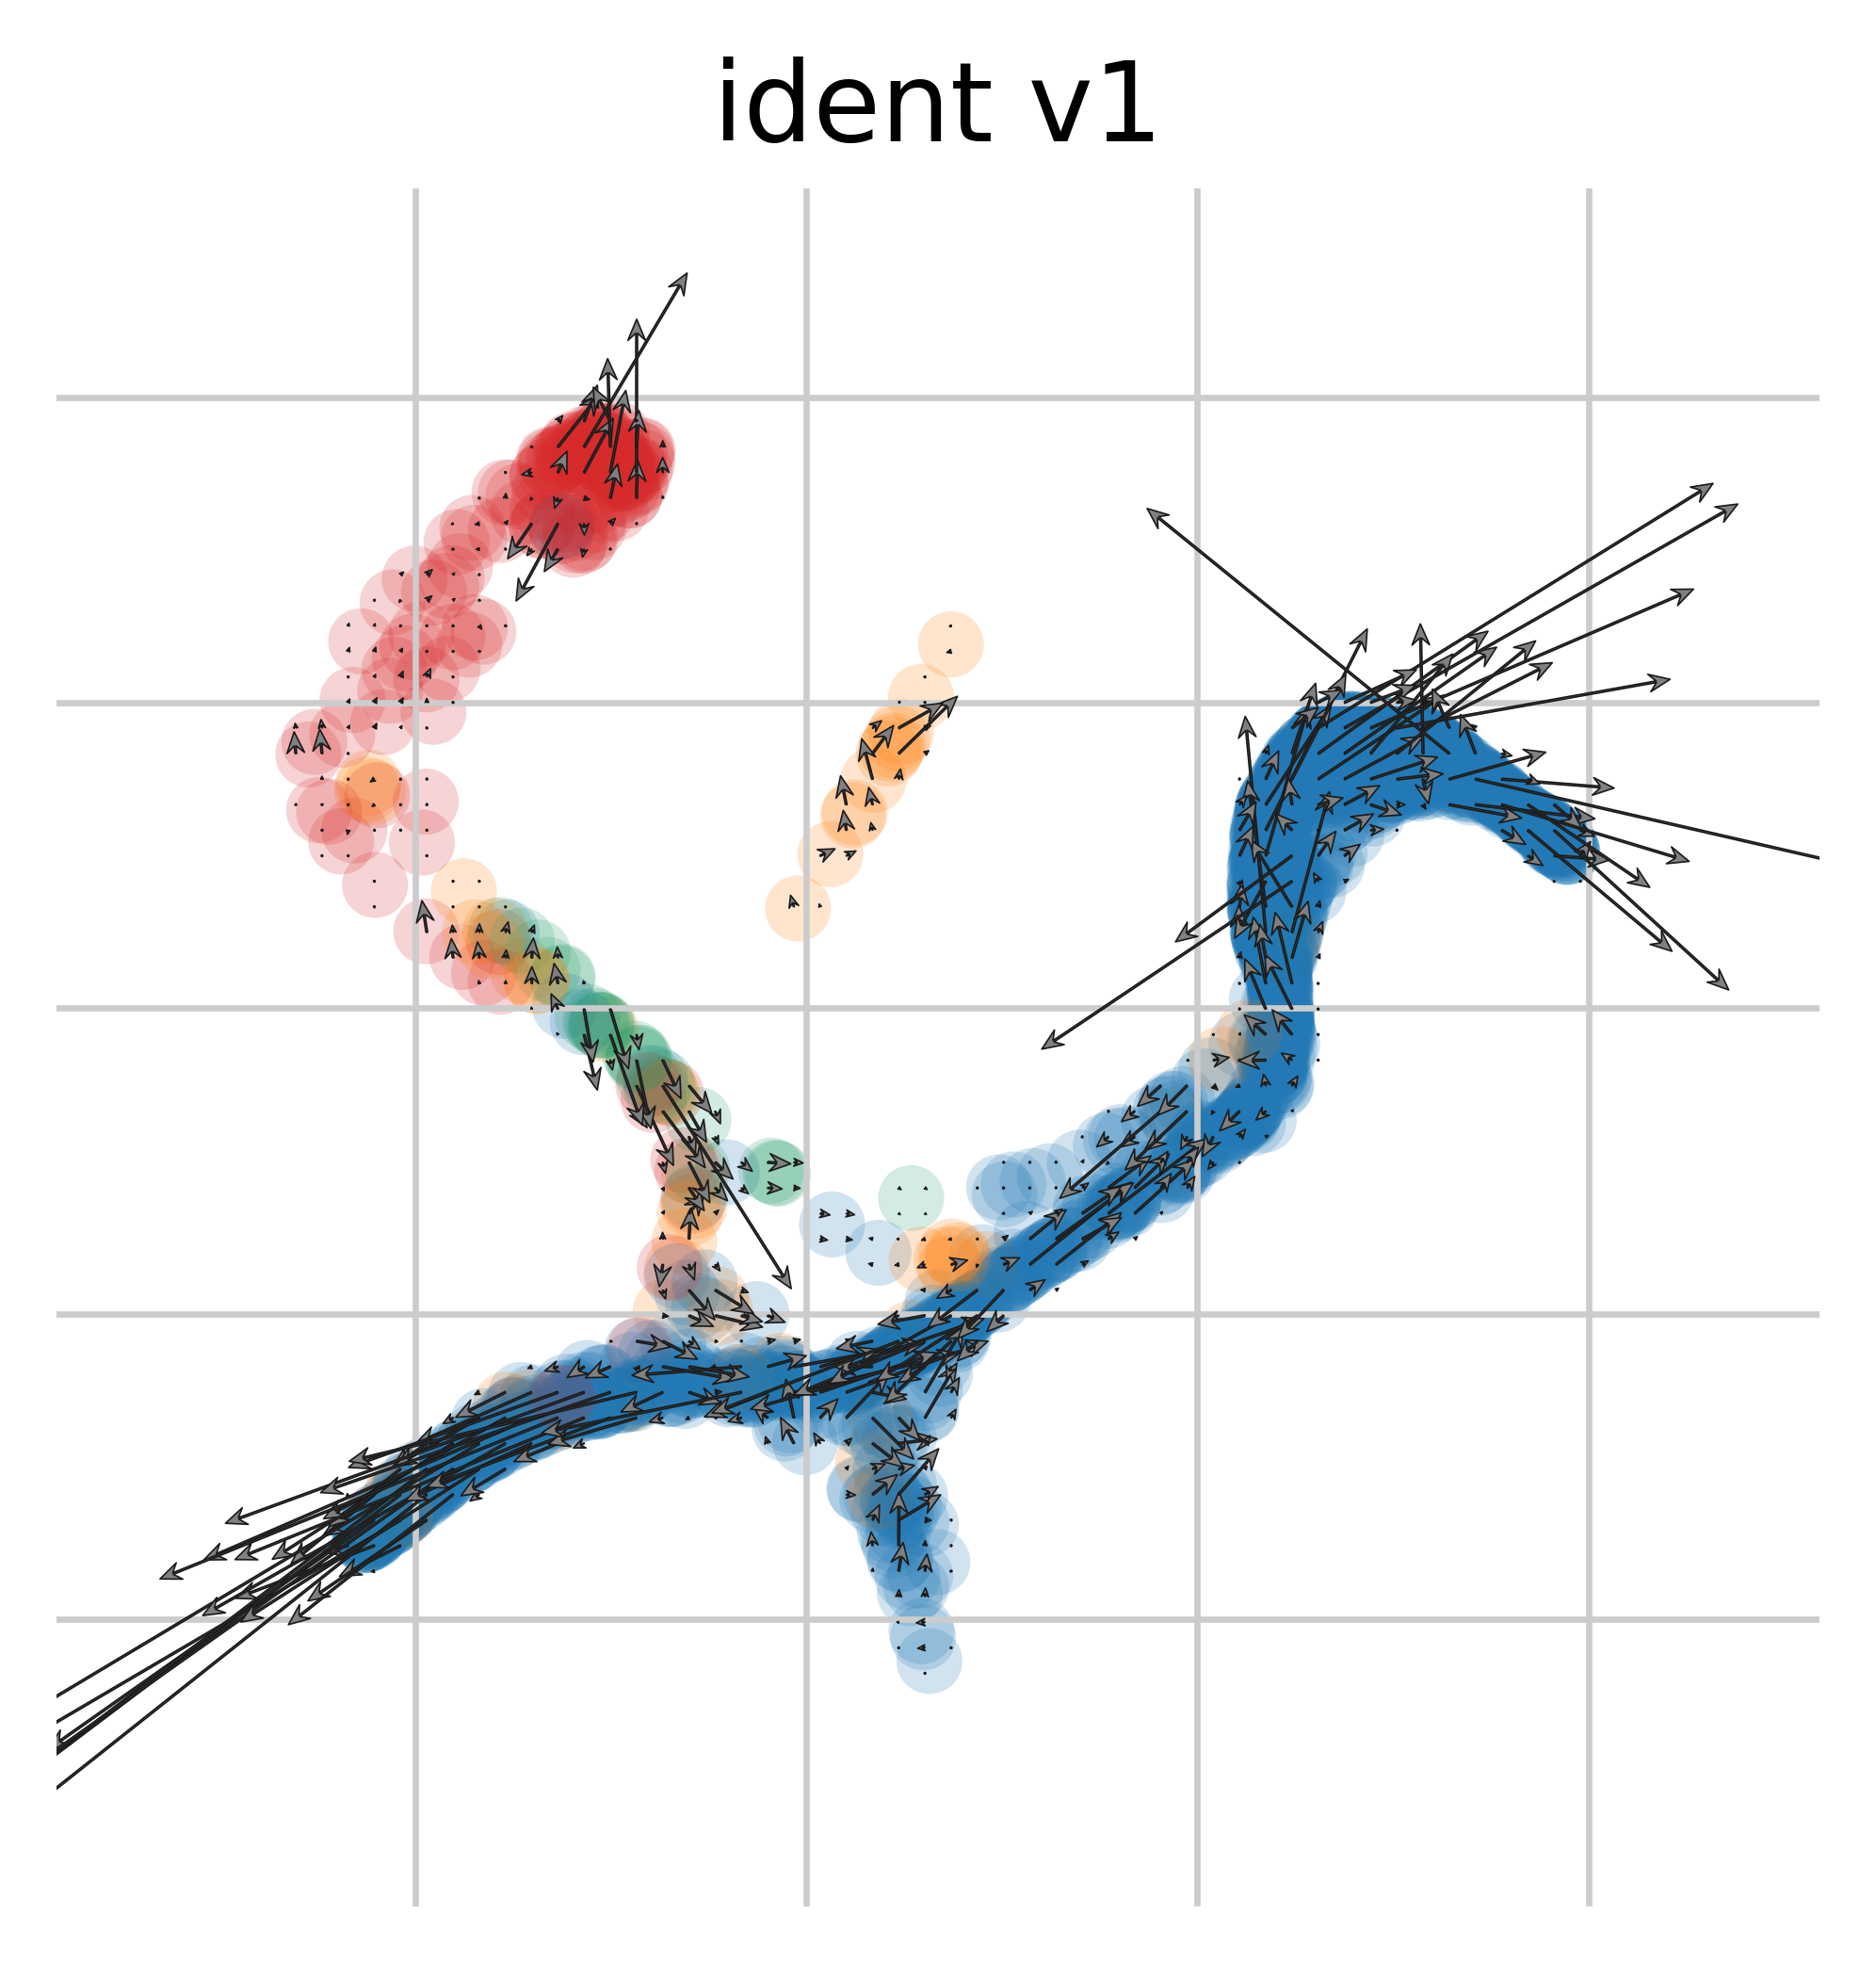

In [117]:
scv.pl.velocity_embedding_grid(mg_KO, basis='draw_graph_fa', color = 'ident_v1', dpi = 300, add_margin = 0.2, figsize = (4,4), arrow_length = 8, arrow_size = 2, density = 1)

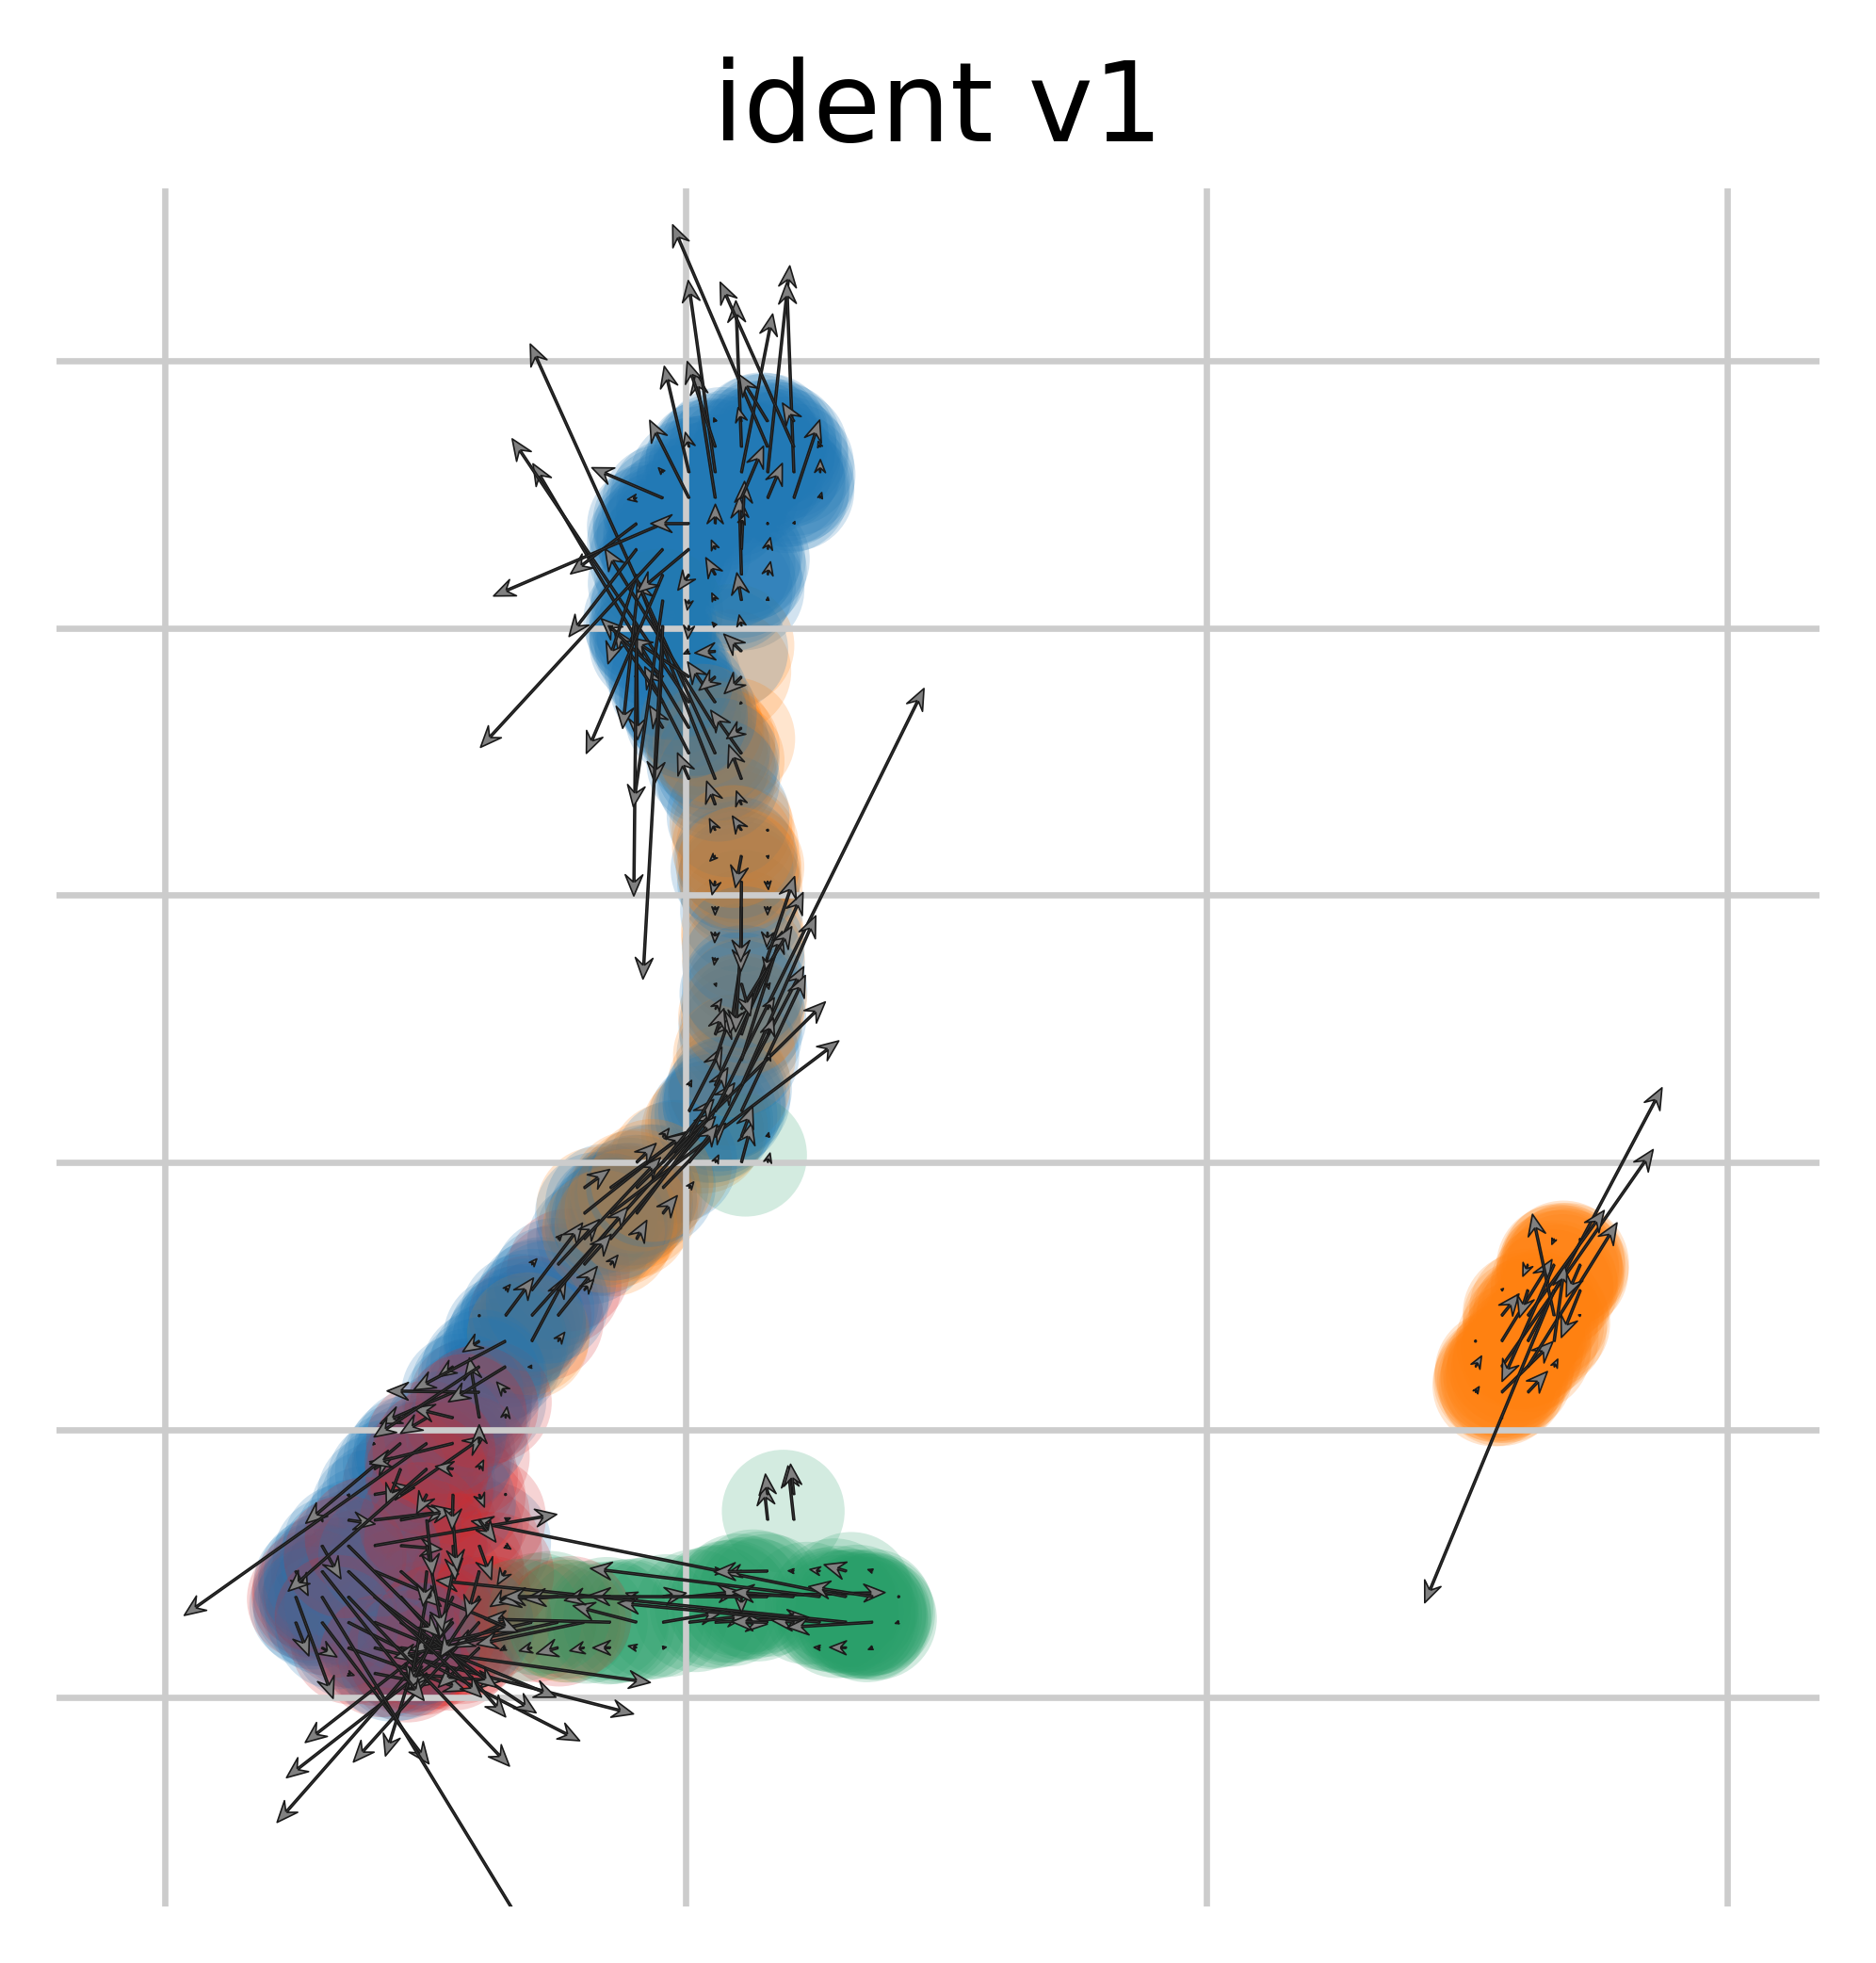

In [118]:
scv.pl.velocity_embedding_grid(mg_WTB, basis='draw_graph_fa', color = 'ident_v1', dpi = 300, add_margin = 0.2, figsize = (4,4), arrow_length = 8, arrow_size = 2, density = 1)

In [91]:
A.var_names_make_unique()

In [92]:
B.var_names_make_unique()
WT.var_names_make_unique()
GF.var_names_make_unique()
KO.var_names_make_unique()
SPF.var_names_make_unique()
MBA.var_names_make_unique()
MBNA.var_names_make_unique()

In [93]:
loom = A.concatenate([WT,B,GF,KO,SPF,MBA,MBNA])

In [147]:
mg_velo = scv.utils.merge(mg, loom)

In [95]:
mg.obs

orig.ident  nCount_RNA  nFeature_RNA Group  percent.mt keep  \
AAAGTGATCAGCTTCC           0      6420.0          2114     A    1.775701    Y   
AAAGTGATCAGGAAGC           0      4789.0          1835     A    0.751723    Y   
AACAAAGAGTAGATCA           0       560.0           346     A    7.857143    Y   
AACCATGTCCGCACTT           0       668.0           345     A    2.994012    Y   
AACCCAAGTGACAGGT           0      8356.0          2660     A    0.885591    Y   
...                      ...         ...           ...   ...         ...  ...   
TTTCGATGTGTTACTG           7      1152.0           618    WT    4.253472    Y   
TTTGACTTCTTGCGCT           7       805.0           457    WT    4.844720    Y   
TTTGGAGTCAACTGGT           7       781.0           464    WT    2.048656    Y   
TTTGGAGTCGAGTACT           7      8089.0          2624    WT    1.532946    Y   
TTTGGTTTCCCATTTA           7       453.0           304    WT    1.324503    Y   

                  RNA_snn_res.2  seurat_clusters  RNA_snn_res.1  \
AAAGTGATCAGCTTCC             39                6              6   
AAAGTGATCAGGAAGC              7                0              0   
AACAAAGAGTAGATCA              8                2              2   
AACCATGTCCGCACTT              8                2              2   
AACCCAAGTGACAGGT              7                0              0   
...                         ...              ...            ...   
TTTCGATGTGTTACTG              6                1              1   
TTTGACTTCTTGCGCT              6                1              1   
TTTGGAGTCAACTGGT             33                5              5   
TTTGGAGTCGAGTACT              7                0              0   
TTTGGTTTCCCATTTA             33                5              5   

                                    ident_v1   ident_L1 ident_v2  \
AAAGTGATCAGCTTCC        Microglia_Inflamm_C1  Microglia        6   
AAAGTGATCAGGAAGC       Microglia_IFN-Resp_C2  Microglia        0   
AACAAAGAGTAGATCA       Microglia_IFN-Resp_C2  Microglia        2   
AACCATGTCCGCACTT       Microglia_IFN-Resp_C2  Microglia        2   
AACCCAAGTGACAGGT       Microglia_IFN-Resp_C2  Microglia        0   
...                                      ...        ...      ...   
TTTCGATGTGTTACTG        Microglia_resting_C0  Microglia        1   
TTTGACTTCTTGCGCT        Microglia_resting_C0  Microglia        1   
TTTGGAGTCAACTGGT  Microglia_Proliferating_C3  Microglia        5   
TTTGGAGTCGAGTACT       Microglia_IFN-Resp_C2  Microglia        0   
TTTGGTTTCCCATTTA        Microglia_resting_C0  Microglia        5   

                  IFN-response  Inflammatory  Homeostatic  Proinflammatory  \
AAAGTGATCAGCTTCC     -0.266597      1.308520    -0.065602         1.199677   
AAAGTGATCAGGAAGC      0.079006      0.152746     1.245843         0.881566   
AACAAAGAGTAGATCA     -0.102338     -0.276785     1.080628         0.420393   
AACCATGTCCGCACTT     -0.099397     -0.235671     0.863202         0.098131   
AACCCAAGTGACAGGT     -0.074524     -0.379173     1.462691         0.578293   
...                        ...           ...          ...              ...   
TTTCGATGTGTTACTG     -0.263483     -0.508013     0.678629         0.409939   
TTTGACTTCTTGCGCT     -0.164551      0.284010     0.635711         0.416874   
TTTGGAGTCAACTGGT     -0.109374     -0.343507    -0.094295         0.491370   
TTTGGAGTCGAGTACT      0.133370     -0.416208     1.322500         0.779402   
TTTGGTTTCCCATTTA     -0.088175      0.912032    -0.237590         0.390715   

                  Proliferating sample_batch  
AAAGTGATCAGCTTCC      -0.051710         A_-1  
AAAGTGATCAGGAAGC      -0.056378         A_-1  
AACAAAGAGTAGATCA       0.000000         A_-1  
AACCATGTCCGCACTT       0.000000         A_-1  
AACCCAAGTGACAGGT      -0.074676         A_-1  
...                         ...          ...  
TTTCGATGTGTTACTG      -0.022701        WT_-1  
TTTGACTTCTTGCGCT       0.000000        WT_-1  
TTTGGAGTCAACTGGT      -0.085312        WT_-1  
TTTGGAGTCGAGTACT

In [96]:
mg_velo.obs

orig.ident  nCount_RNA  nFeature_RNA Group  percent.mt keep  \
AAAGTGATCAGCTTCC           0      6420.0          2114     A    1.775701    Y   
AAAGTGATCAGGAAGC           0      4789.0          1835     A    0.751723    Y   
AACAAAGAGTAGATCA           0       560.0           346     A    7.857143    Y   
AACCCAAGTGACAGGT           0      8356.0          2660     A    0.885591    Y   
AACCTGAGTTCGTGCG           0      5656.0          1917     A    2.263083    Y   
...                      ...         ...           ...   ...         ...  ...   
TTTACTGGTACAGGTG           7      3181.0           948    WT    3.929582    Y   
TTTATGCTCGGCGATC           7     10881.0          3081    WT    2.371106    Y   
TTTCAGTAGTGCACTT           7      2232.0           884    WT    1.612903    Y   
TTTCATGAGGAAACGA           7      1249.0           741    WT    0.160128    Y   
TTTGGAGTCGAGTACT           7      8089.0          2624    WT    1.532946    Y   

                  RNA_snn_res.2  seurat_clusters  RNA_snn_res.1  \
AAAGTGATCAGCTTCC             39                6              6   
AAAGTGATCAGGAAGC              7                0              0   
AACAAAGAGTAGATCA              8                2              2   
AACCCAAGTGACAGGT              7                0              0   
AACCTGAGTTCGTGCG             39                6              6   
...                         ...              ...            ...   
TTTACTGGTACAGGTG             33                5              5   
TTTATGCTCGGCGATC              7                0              0   
TTTCAGTAGTGCACTT             26                1              1   
TTTCATGAGGAAACGA              6                1              1   
TTTGGAGTCGAGTACT              7                0              0   

                                    ident_v1  ... Proinflammatory  \
AAAGTGATCAGCTTCC        Microglia_Inflamm_C1  ...        1.199677   
AAAGTGATCAGGAAGC       Microglia_IFN-Resp_C2  ...        0.881566   
AACAAAGAGTAGATCA       Microglia_IFN-Resp_C2  ...        0.420393   
AACCCAAGTGACAGGT       Microglia_IFN-Resp_C2  ...        0.578293   
AACCTGAGTTCGTGCG        Microglia_Inflamm_C1  ...        0.841590   
...                                      ...  ...             ...   
TTTACTGGTACAGGTG  Microglia_Proliferating_C3  ...        0.747713   
TTTATGCTCGGCGATC       Microglia_IFN-Resp_C2  ...        0.625015   
TTTCAGTAGTGCACTT       Microglia_IFN-Resp_C2  ...        0.900409   
TTTCATGAGGAAACGA        Microglia_resting_C0  ...        0.792023   
TTTGGAGTCGAGTACT       Microglia_IFN-Resp_C2  ...        0.779402   

                 Proliferating  sample_batch  Clusters         _X         _Y  \
AAAGTGATCAGCTTCC     -0.051710          A_-1         0  24.094585  -1.662410   
AAAGTGATCAGGAAGC     -0.056378          A_-1         1 -10.900916  -0.134726   
AACAAAGAGTAGATCA      0.000000          A_-1         1   7.741675 -10.564025   
AACCCAAGTGACAGGT     -0.074676          A_-1         1 -10.236865  -0.995804   
AACCTGAGTTCGTGCG     -0.055846          A_-1         1   7.041489  -4.339295   
...                        ...           ...       ...        ...        ...   
TTTACTGGTACAGGTG     -0.042647         WT_-1         2 -17.945219 -16.958504   
TTTATGCTCGGCGATC     -0.073008         WT_-1         0   5.810129  21.137325   
TTTCAGTAGTGCACTT     -0.034023         WT_-1         4 -22.651520  27.523420   
TTTCATGAGGAAACGA     -0.065938         WT_-1         0  17.268766  25.305561   
TTTGGAGTCGAGTACT     -0.039638         WT_-1         0  11.524692  28.765951   

                  initial_size_spliced initial_size_unspliced  initial_size  \
AAAGTGATCAGCTTCC                4898.0                 2074.0        4898.0   
AAAGTGATCAGGAAGC                3845.0                 1582.0        3845.0   
AACAAAGAGTAGATCA                 280.0                  945.0         280.0   
AACCCAAGTGACAGGT                6686.0                 4526.0        6686.0   
AACCTGAGTTCGTGCG                4182.0                 

In [148]:
scv.pp.filter_and_normalize(mg_velo, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(mg_velo, n_pcs=30, n_neighbors=30)

Filtered out 15505 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [149]:
scv.tl.velocity(mg_velo)

computing velocities
The correlation threshold has been reduced to 0.0.
Please be cautious when interpreting results.


LinAlgError: SVD did not converge

In [155]:
mg_velo.layers['spliced']

<3865x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 729430 stored elements in Compressed Sparse Row format>

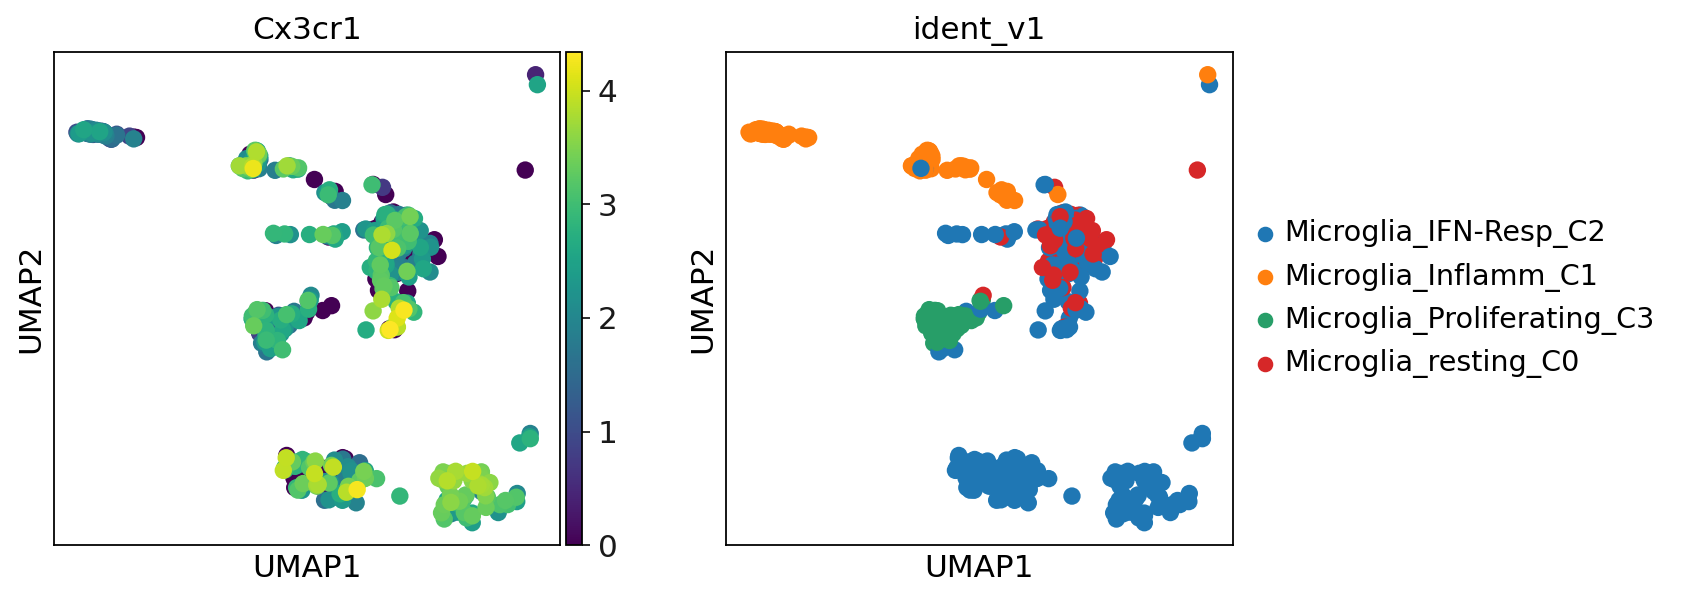

In [102]:
sc.pl.umap(mg_WTB,color=['Cx3cr1', 'ident_v1'] )

In [103]:
mg_WTB_rec = mg_WTB

In [106]:
sc.tl.umap(mg_WTB_rec)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


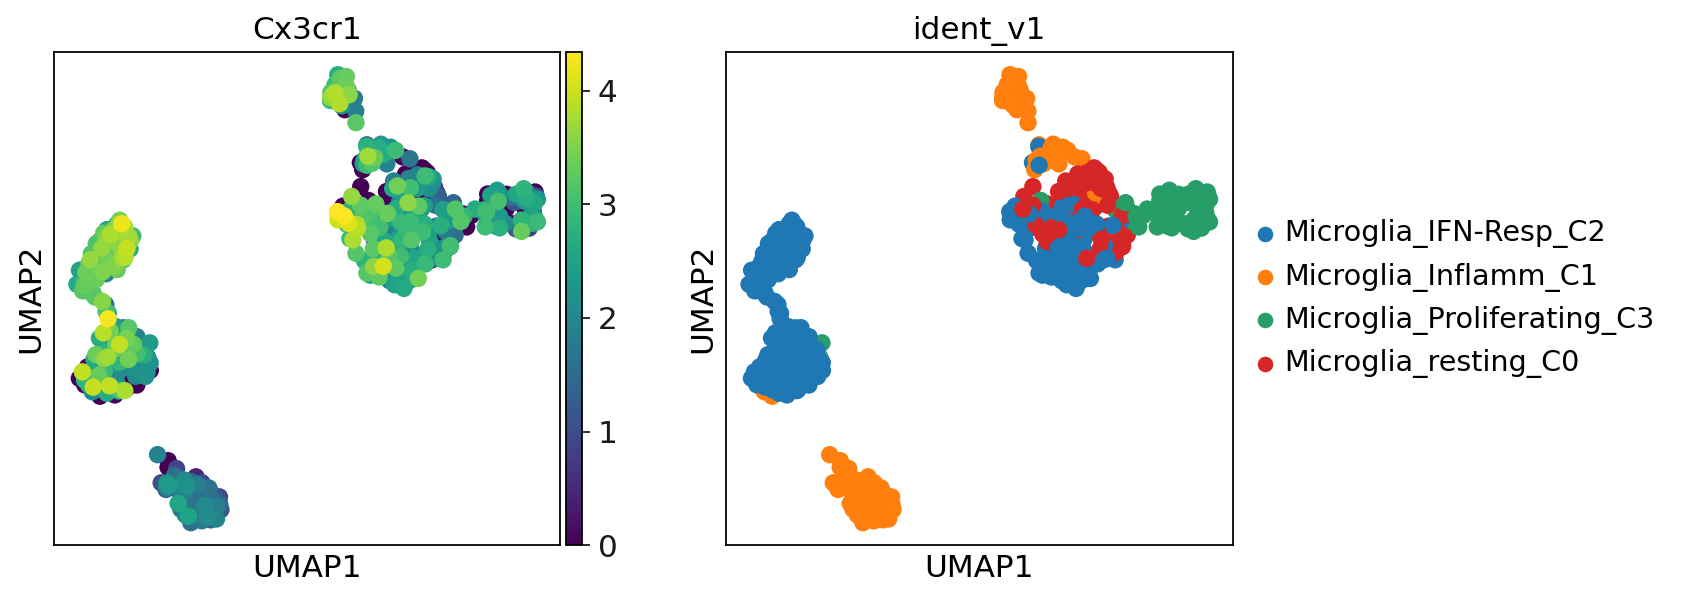

In [107]:
sc.pl.umap(mg_WTB_rec,color=['Cx3cr1', 'ident_v1'] )

In [108]:
sc.pp.pca(mg_WTB_rec)
pca_projections = pd.DataFrame(mg_WTB_rec.obsm["X_pca"],index=mg_WTB_rec.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections)
ms_data = palantir.utils.determine_multiscale_space(dm_res,n_eigs=4)
mg_WTB_rec.obsm["X_palantir"]=ms_data.values
sc.pp.neighbors(mg_WTB_rec,n_neighbors=30,use_rep="X_palantir")
mg_WTB_rec.obsm["X_pca2d"]=mg_WTB_rec.obsm["X_pca"][:,:3]
sc.tl.draw_graph(mg_WTB_rec, layout = 'fa',init_pos='X_pca2d')
#sc.pl.draw_graph(mg,color=['Cx3cr1', 'ident_v1'], layout = 'fa')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:01)


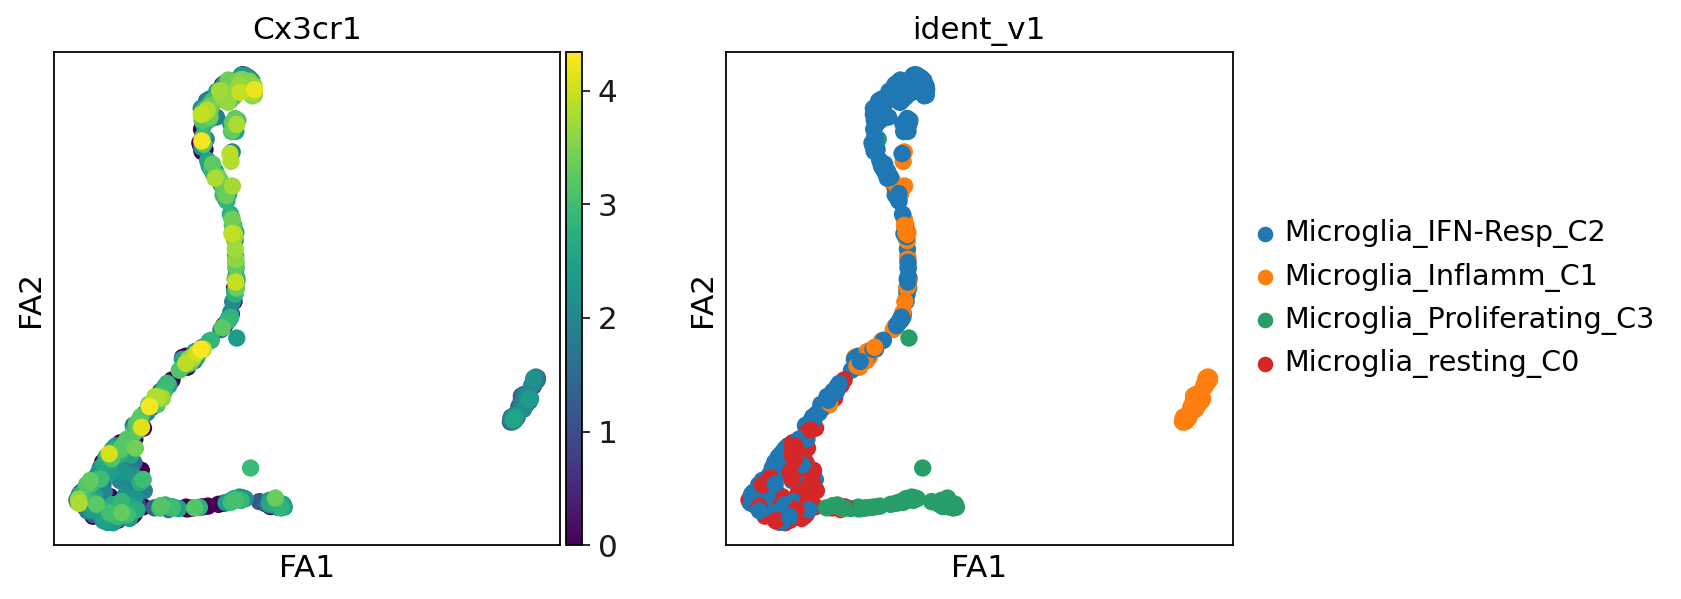

In [109]:
sc.pl.draw_graph(mg_WTB_rec,color=['Cx3cr1', 'ident_v1'], layout = 'fa')

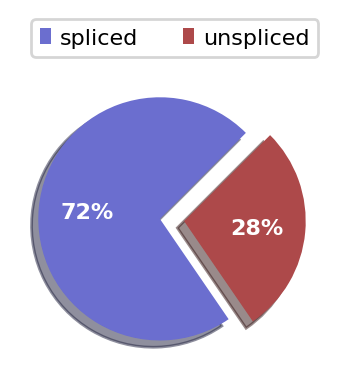

In [110]:
scv.pl.proportions(mg_WTB_rec)

In [111]:
scv.pp.filter_and_normalize(mg_WTB_rec, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(mg_WTB_rec, n_pcs=30, n_neighbors=30)

Filtered out 1486 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [112]:
scv.tl.velocity(mg_WTB_rec)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [113]:
scv.tl.velocity_graph(mg_WTB_rec)

computing velocity graph (using 1/12 cores)


  0%|          | 0/490 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_draw_graph_fa', embedded velocity vectors (adata.obsm)


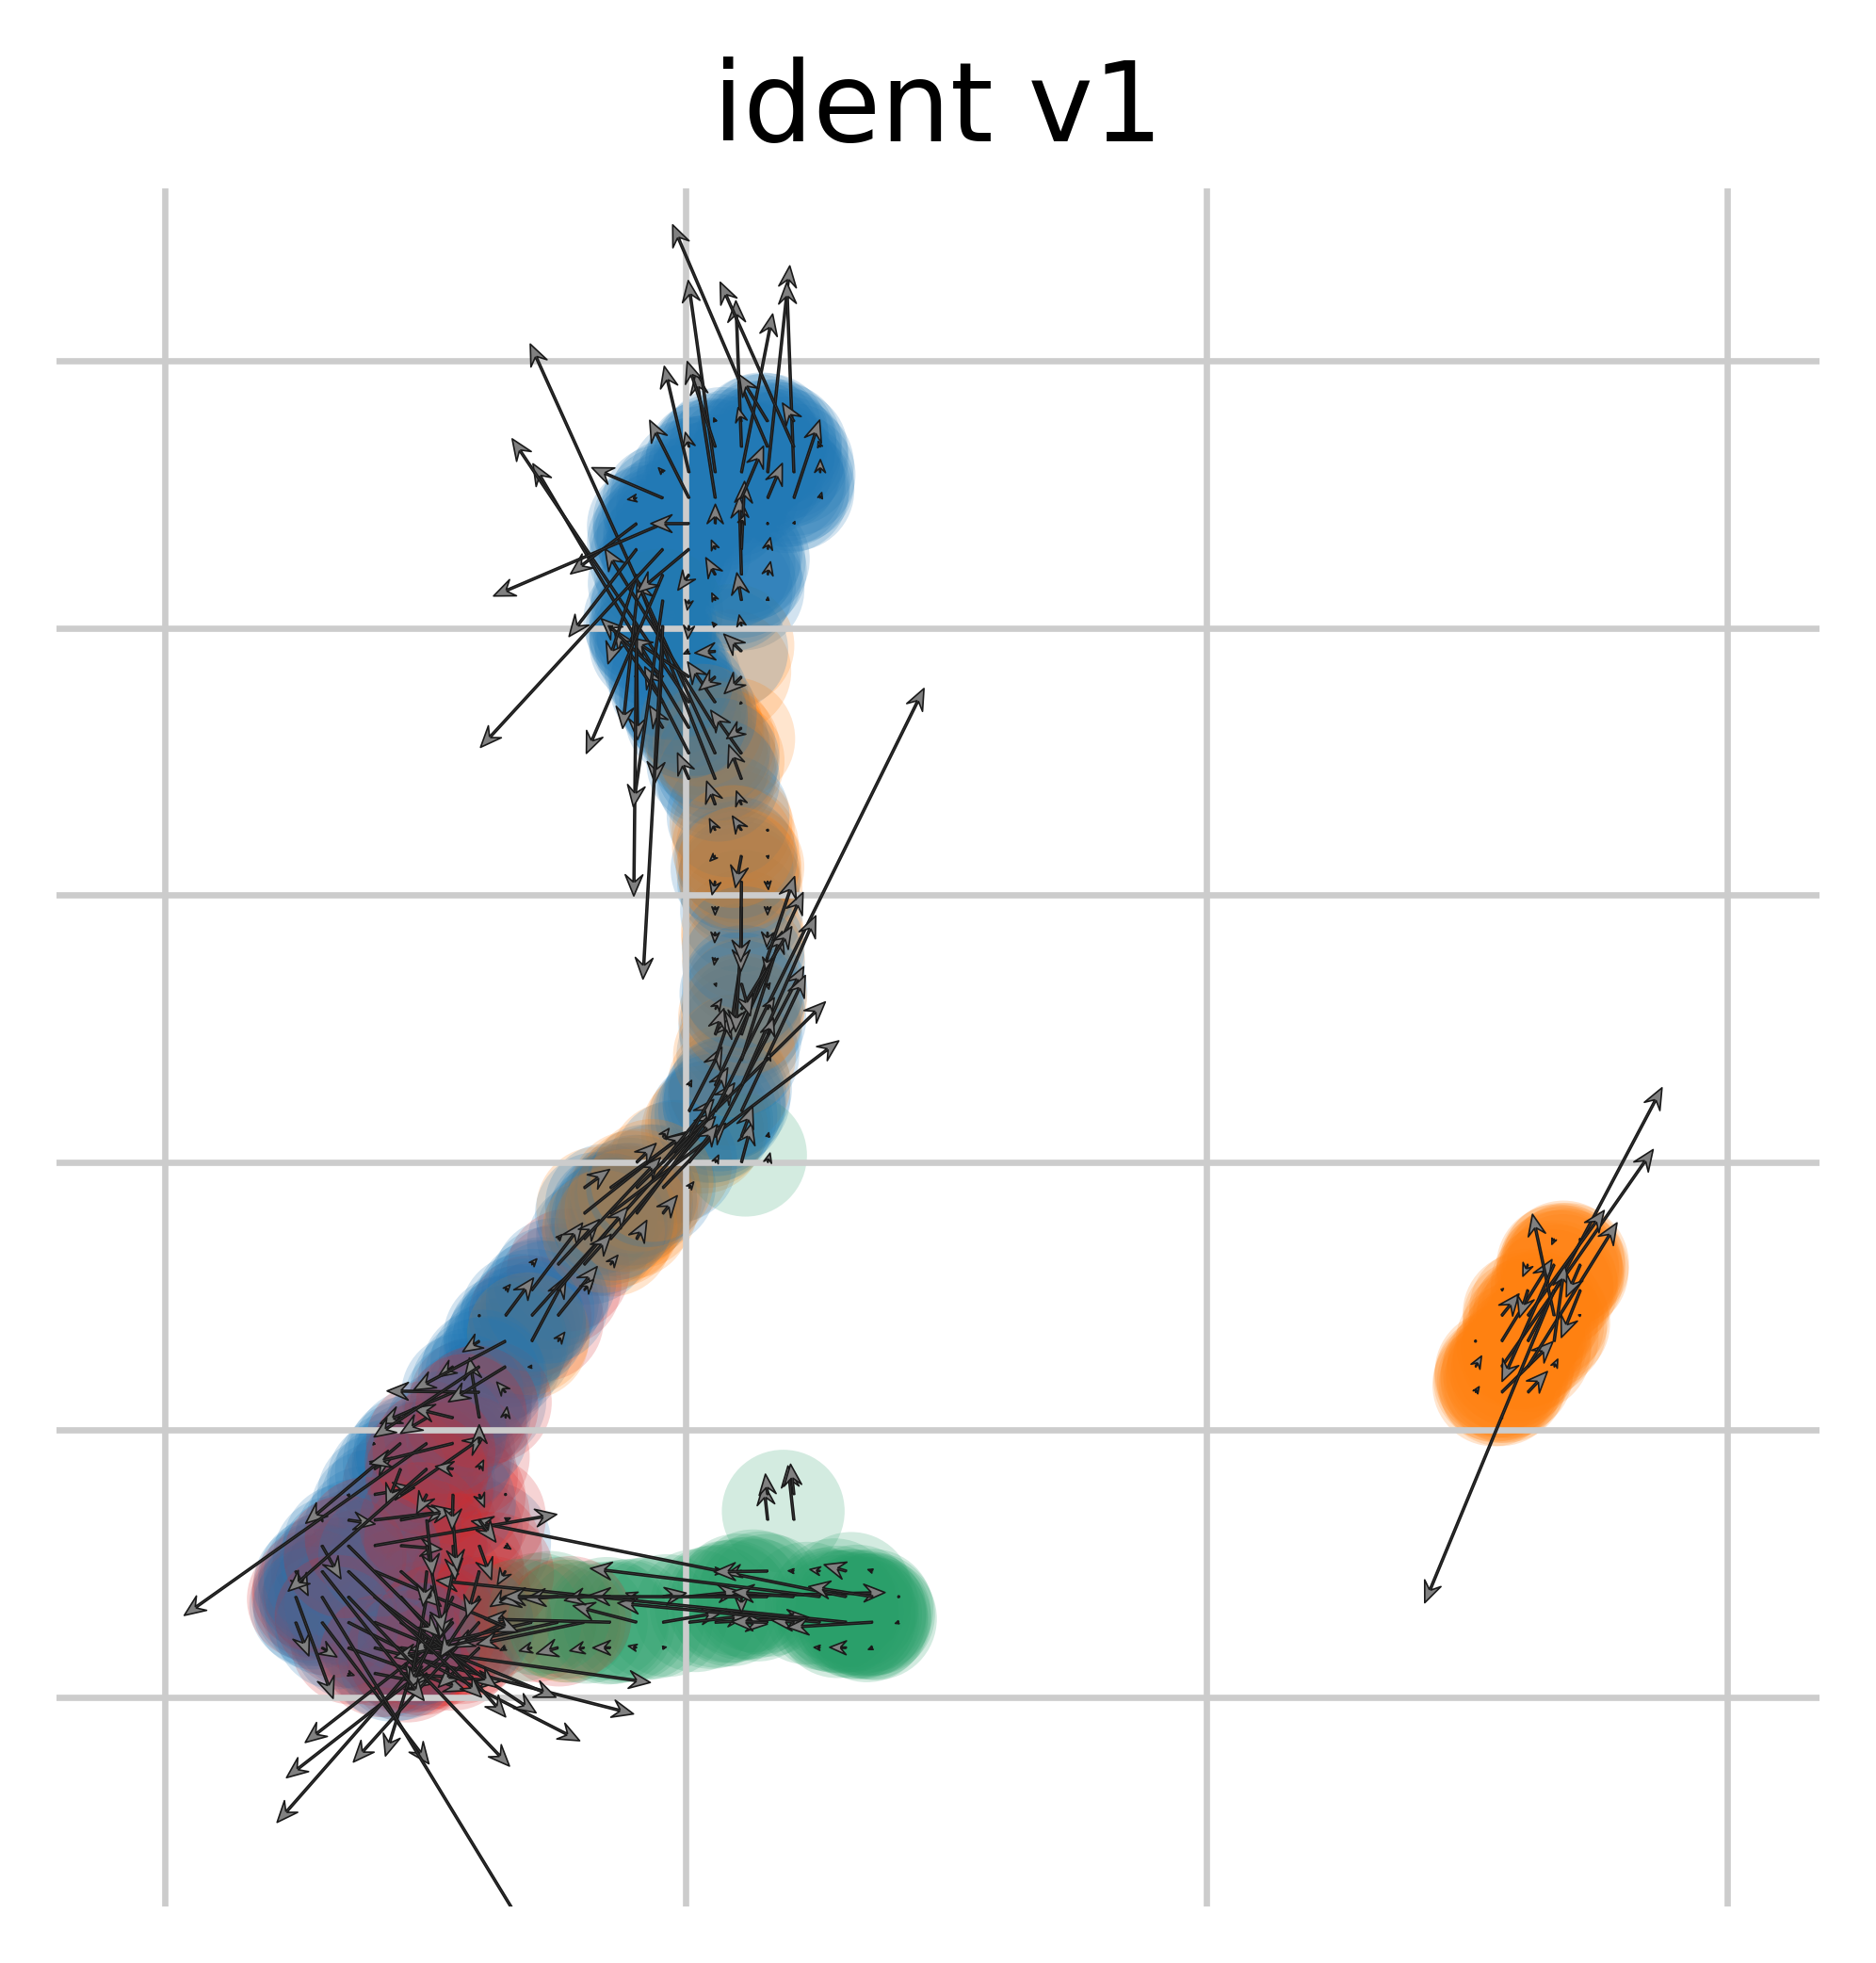

In [115]:
scv.pl.velocity_embedding_grid(mg_WTB_rec, basis='draw_graph_fa', color = 'ident_v1', dpi = 300, add_margin = 0.2, figsize = (4,4), arrow_length = 8, arrow_size = 2, density = 1)

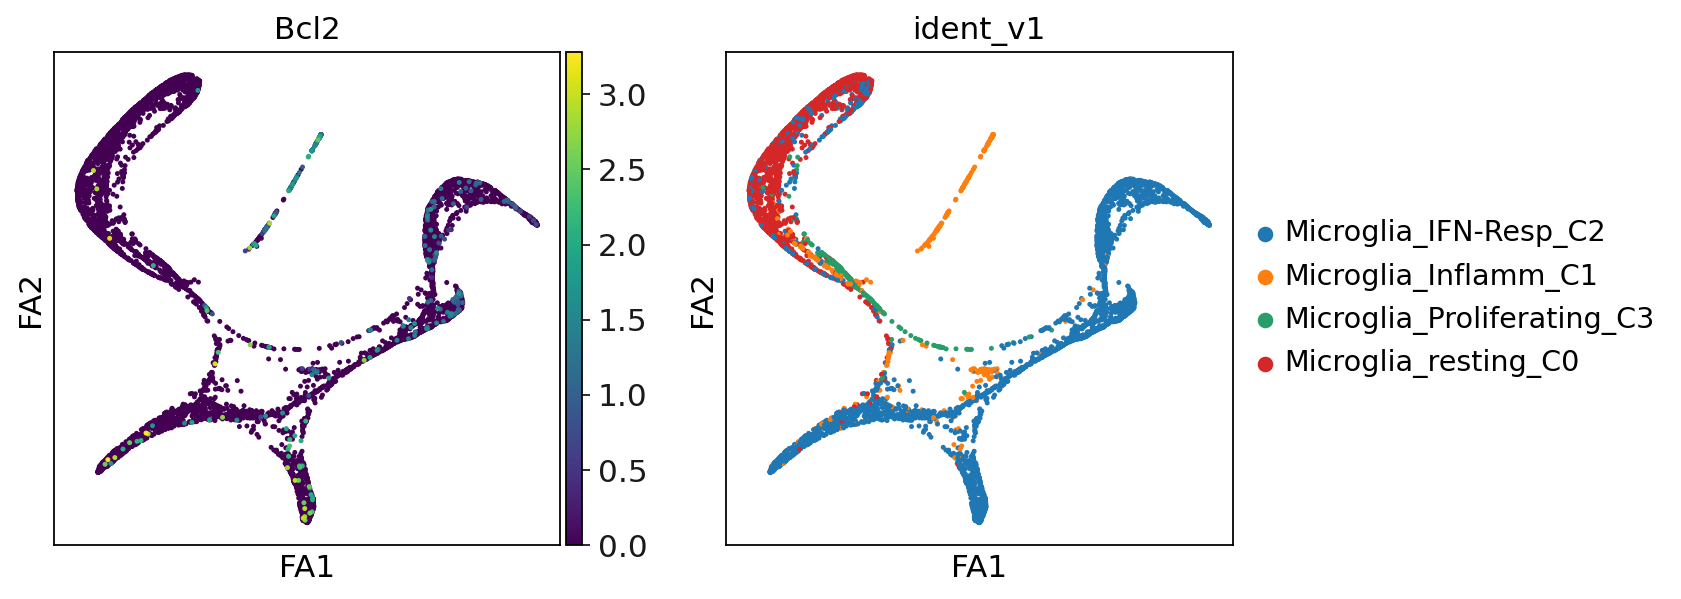

In [120]:
sc.pl.draw_graph(mg,color=['Bcl2', 'ident_v1'], layout = 'fa')

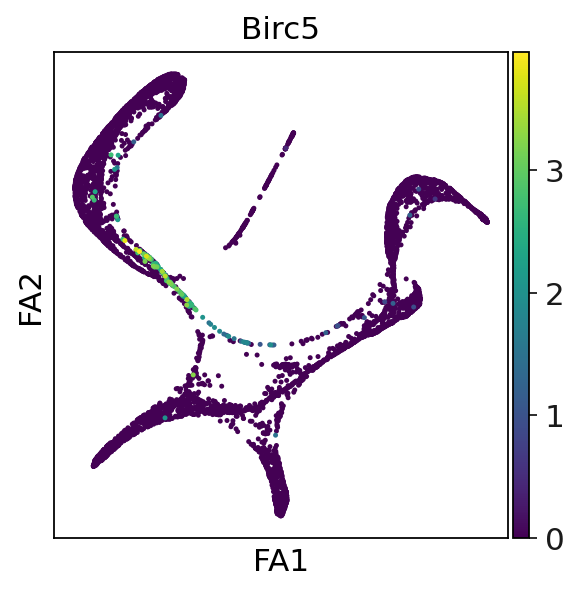

In [125]:
sc.pl.draw_graph(mg,color=['Birc5'], layout = 'fa') #apoptosis inhibitor

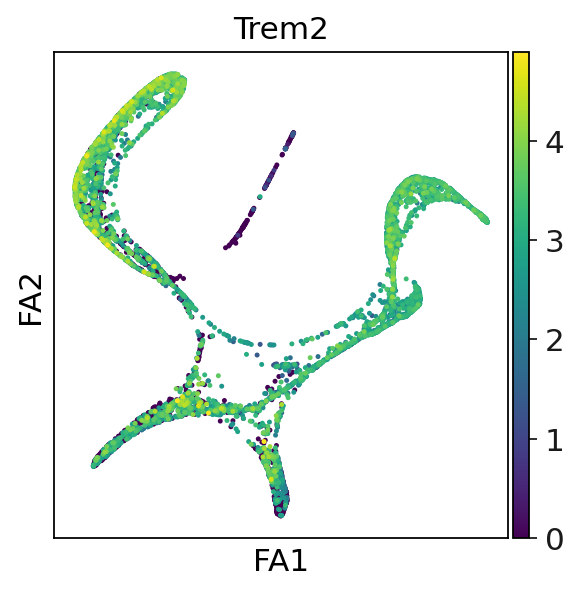

In [130]:
sc.pl.draw_graph(mg,color=['Trem2'], layout = 'fa')

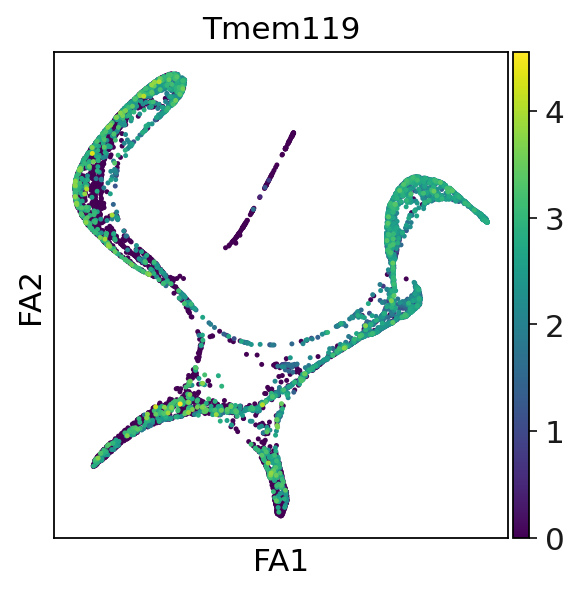

In [131]:
sc.pl.draw_graph(mg,color=['Tmem119'], layout = 'fa')

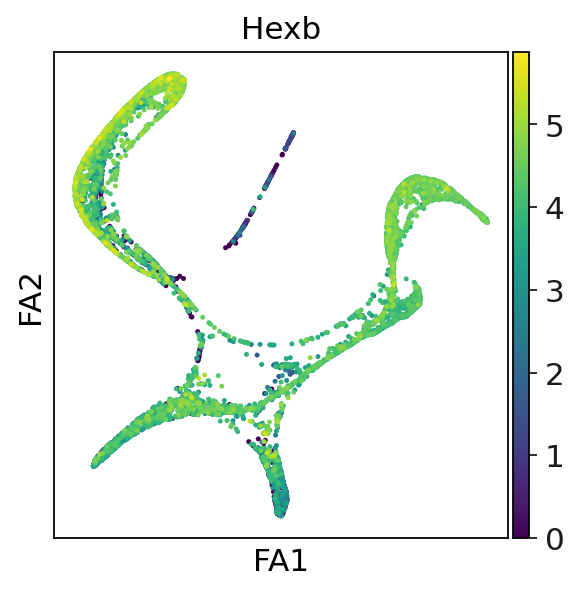

In [133]:
sc.pl.draw_graph(mg,color=['Hexb'], layout = 'fa')

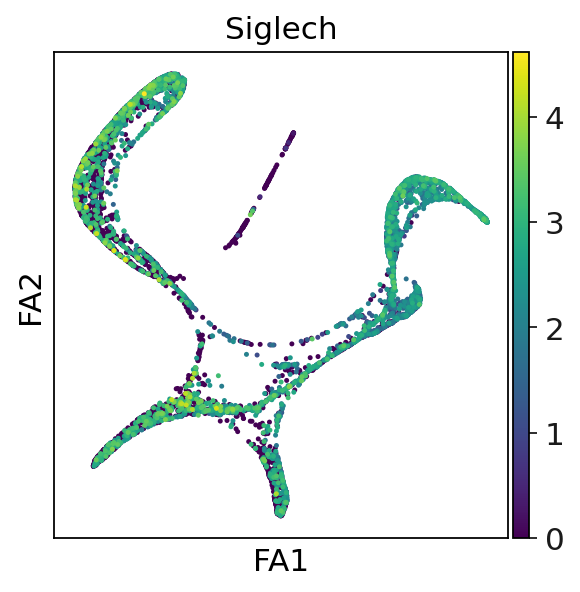

In [136]:
sc.pl.draw_graph(mg,color=['Siglech'], layout = 'fa')

In [138]:
sc.tl.leiden(mg)

running Leiden clustering
    finished: found 28 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


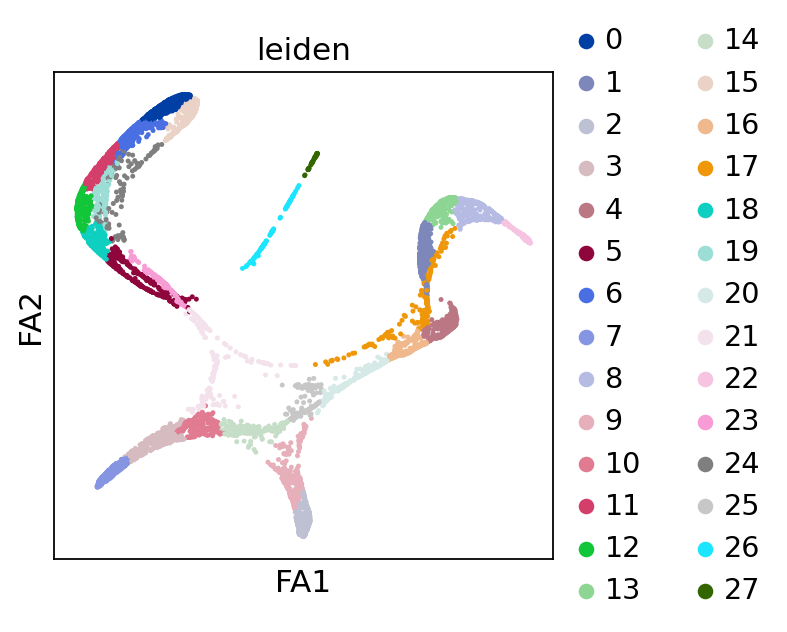

In [139]:
sc.pl.draw_graph(mg,color=['leiden'], layout = 'fa')

In [140]:
mg = mg[mg.obs['leiden'].isin(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25'])]

In [141]:
sc.pp.pca(mg)
pca_projections = pd.DataFrame(mg.obsm["X_pca"],index=mg.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections)
ms_data = palantir.utils.determine_multiscale_space(dm_res,n_eigs=4)
mg.obsm["X_palantir"]=ms_data.values
sc.pp.neighbors(mg,n_neighbors=30,use_rep="X_palantir")
mg.obsm["X_pca2d"]=mg.obsm["X_pca"][:,:3]
sc.tl.draw_graph(mg, layout = 'fa',init_pos='X_pca2d')
#sc.pl.draw_graph(mg,color=['Cx3cr1', 'ident_v1'], layout = 'fa')

computing PCA
    with n_comps=50
    finished (0:00:44)
Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:38)


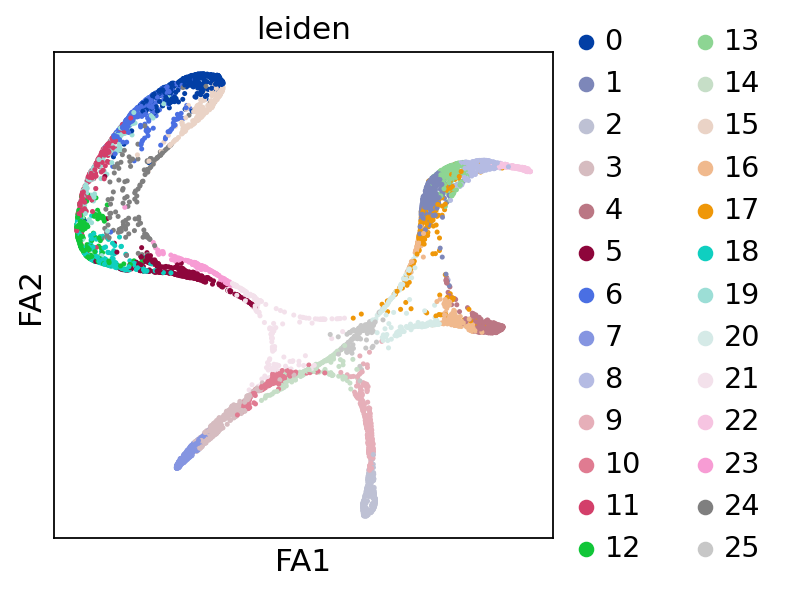

In [142]:
sc.pl.draw_graph(mg,color=['leiden'], layout = 'fa')

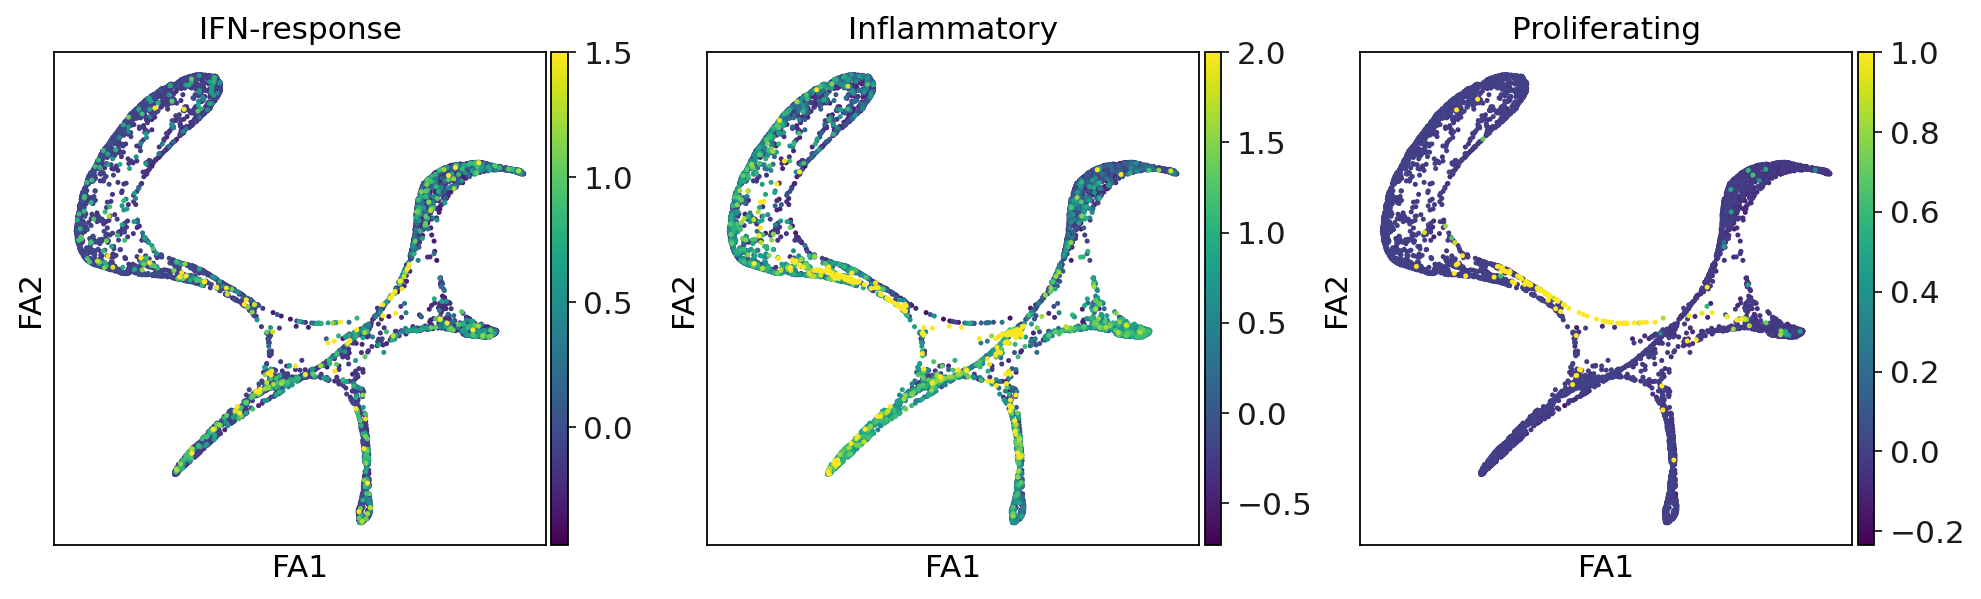

In [143]:
sc.pl.draw_graph(mg,color=['IFN-response','Inflammatory','Proliferating'], vmax = [1.5,2,1])

In [146]:
mg

AnnData object with n_obs × n_vars = 5819 × 21607
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Group', 'percent.mt', 'keep', 'RNA_snn_res.2', 'seurat_clusters', 'RNA_snn_res.1', 'ident_v1', 'ident_L1', 'ident_v2', 'IFN-response', 'Inflammatory', 'Homeostatic', 'Proinflammatory', 'Proliferating', 'sample_batch', 'leiden'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'pca', 'neighbors', 'draw_graph', 'ident_v1_colors', 'Group_colors', 'leiden', 'leiden_colors'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'X_palantir', 'X_pca2d', 'X_draw_graph_fa'
    varm: 'HARMONY', 'PCs'
    obsp: 'distances', 'connectivities'